### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points
- exploring the structure using decision tree
- exploring clusters in customer behaviour
- can social data (e.g. customer reviews) be used in marketing campaigns 
- loading, transforming and visualising data in R 
- statistical analysis and modelling in R 

# Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. 

## 1. Load and explore the data

In [44]:
#Import the necessary libraries, packages, and modules.
# Data analysis:
import numpy as np  
import pandas as pd 

# Linear regression:
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

# Visualisation:
import matplotlib.pyplot as plt 
import seaborn as sns


In [46]:
# Load the CSV file(s) as reviews
reviews = pd.read_csv('turtle_reviews.csv')

In [48]:
# View the DataFrame : 1st 5 and last 5 rows
pd.concat([reviews.head(), reviews.tail()])

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game

In [50]:
# Checking for missing values?
missing_values = reviews.isnull().sum()
print(missing_values)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [52]:
# Checking for duplicates 
duplicates = reviews.duplicated()
print(duplicates)

num_duplicates = reviews.duplicated().sum()
print(num_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
0


In [54]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [56]:
# Basic descriptive statistics.
reviews.describe().round(2)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.00            2000.00                 2000.00         2000.00   
mean     39.49              48.08                   50.00         1578.03   
std      13.57              23.12                   26.09         1283.24   
min      17.00              12.30                    1.00           25.00   
25%      29.00              30.34                   32.00          772.00   
50%      38.00              47.15                   50.00         1276.00   
75%      49.00              63.96                   73.00         1751.25   
max      72.00             112.34                   99.00         6847.00   

        product  
count   2000.00  
mean    4320.52  
std     3148.94  
min      107.00  
25%     1589.25  
50%     3624.00  
75%     6654.00  
max    11086.00

## 2. Drop columns

In [59]:
# Drop unnecessary columns.
reviews_drop = reviews.drop(['language','platform'], axis=1)
# View column names.
reviews_drop.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [62]:
# Rename the column headers.
reviews_drop_updated = reviews_drop.rename(columns={
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)':'spending_score',
    'product': 'product_code',
    'review':'customer_review',
    'summary': 'review_summary'
})

# View column names.
reviews_drop_updated.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product_code', 'customer_review', 'review_summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [65]:
# Create a CSV file as output.
reviews_drop_updated.to_csv('turtle_reviews_clean.csv',index=False)

In [67]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean.csv')
# View the DataFrame : 1st 5 and last 5 rows
pd.concat([reviews_clean .head(), reviews_clean .tail()])

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product_code                                    customer_review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                         review_summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game

In [69]:
# Explore the data.
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   remuneration     2000 non-null   float64
 3   spending_score   2000 non-null   int64  
 4   loyalty_points   2000 non-null   int64  
 5   education        2000 non-null   object 
 6   product_code     2000 non-null   int64  
 7   customer_review  2000 non-null   object 
 8   review_summary   2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


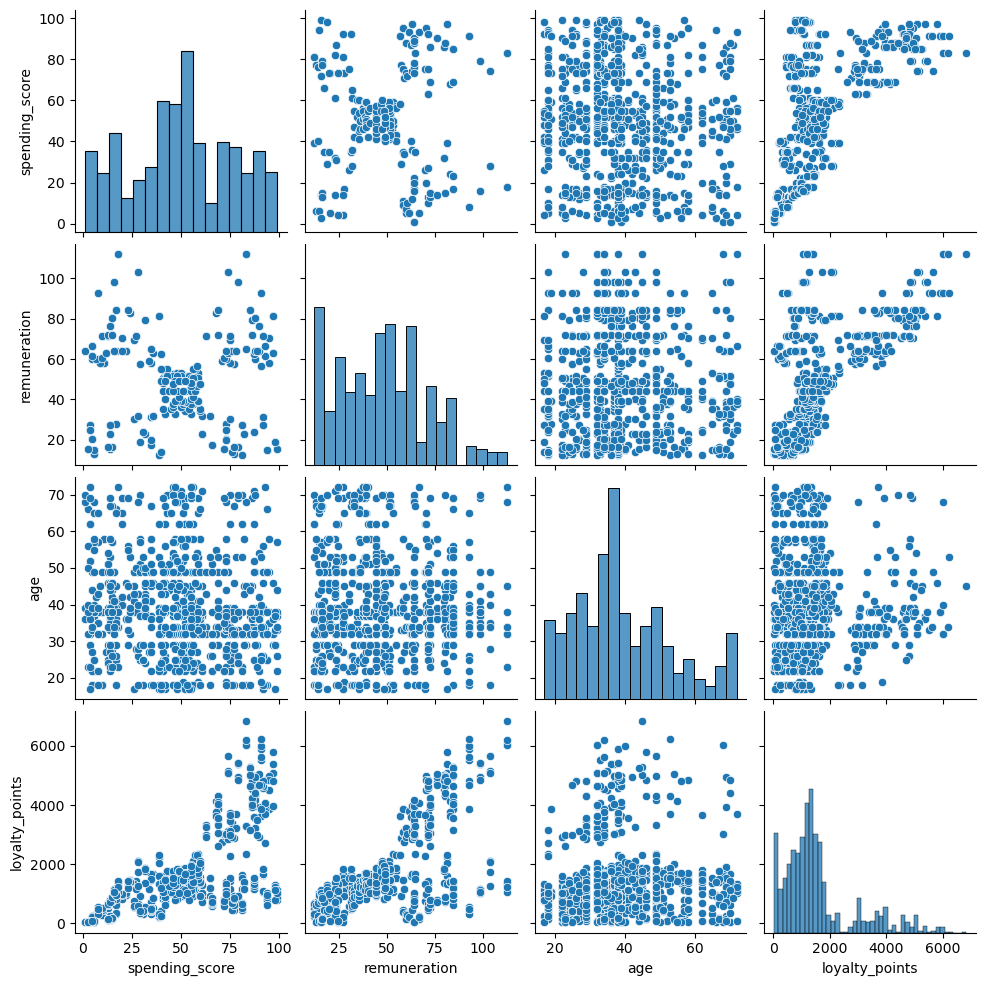

In [70]:
# Pairwise relationships between all variables.
import seaborn as sns
sns.pairplot(reviews_clean[['spending_score', 'remuneration', 'age', 'loyalty_points']])
plt.show()

## 5. Linear regression

### 5a) Spending Score vs Loyalty Points

In [74]:
# Define predictor/Independent variable (X) and outcome/Dependent Variable(y)
X1= reviews_clean['spending_score']
y= reviews_clean['loyalty_points']

In [75]:
# Splitting data into train and test sets (70% train, 30% test)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [76]:
# Create model and print summary of metrics.

# Adding a constant to the independent variable (for the intercept)
X1_train = sm.add_constant(X1_train)

# Creating and fitting the OLS model
model_1 = sm.OLS(y_train, X1_train).fit()

# Displaying the model
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1136.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.01e-182
Time:                        17:05:40   Log-Likelihood:                -11595.
No. Observations:                1400   AIC:                         2.319e+04
Df Residuals:                    1398   BIC:                         2.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -84.0022     55.741     -1.

In [77]:
# Manual Setup of the X coefficient and the constant to generate the regression table.
# View the output.
regression_table = pd.DataFrame({
    'Coefficient': model_1.params,
    'Standard Error': model_1.bse,
    't-value': model_1.tvalues,
    'p-value': model_1.pvalues
})
print("Regression Table:\n", regression_table)

Regression Table:
                 Coefficient  Standard Error    t-value        p-value
const            -84.002228       55.741113  -1.507007   1.320349e-01
spending_score    33.093718        0.982059  33.698300  1.005884e-182


In [78]:
# Manual extraction of the standard errors of the parameters.
standard_errors = model_1.bse
print("Standard Errors of the Parameters:")
print(standard_errors)

Standard Errors of the Parameters:
const             55.741113
spending_score     0.982059
dtype: float64


In [79]:
# Manual extraction of the predicted values on the test set.
X1_test =sm.add_constant(X1_test)  
y_pred = model_1.predict(X1_test)  

print("Predicted Values(first 5 predictions on model_1 Test data):")
print(y_pred.head())


Predicted Values(first 5 predictions on model_1 Test data):
1860      48.372642
353     2431.120310
1333    2265.651722
905     1305.933912
1289    1438.308782
dtype: float64


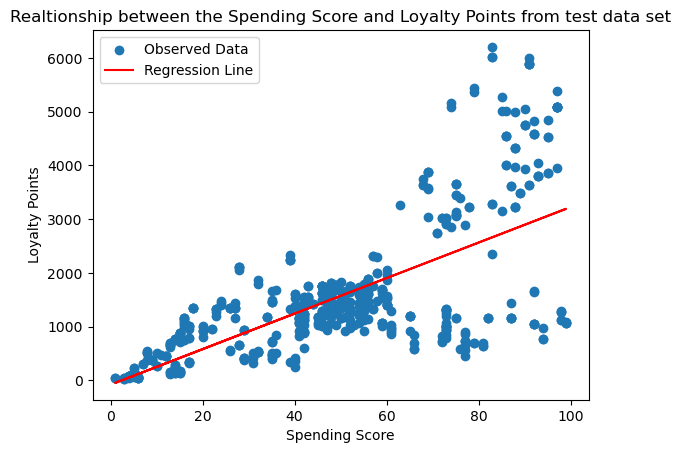

In [83]:
# Plot the graph with a regression line. (TEST DATA)
plt.scatter(X1_test['spending_score'], y_test, label='Observed Data')
plt.plot(X1_test['spending_score'], y_pred, color='red', label='Regression Line')

plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Realtionship between the Spending Score and Loyalty Points from test data set')
plt.legend()
plt.show()

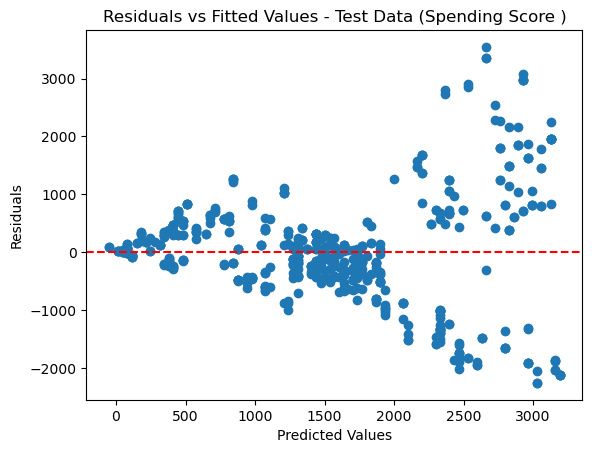

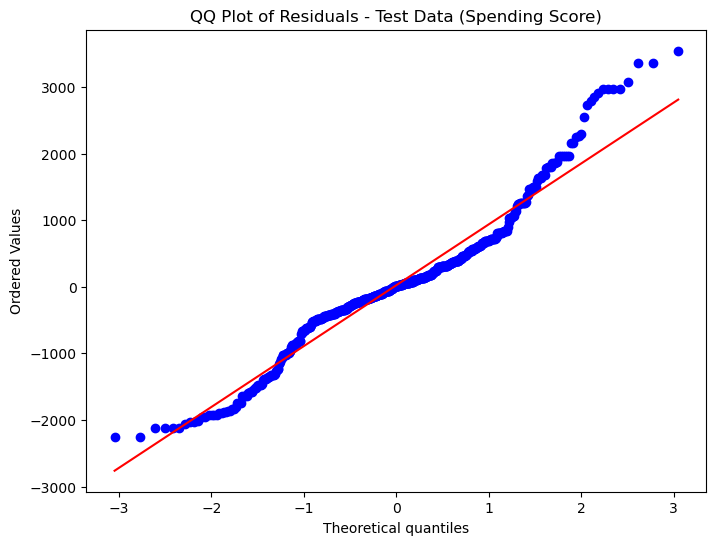

In [89]:
# ---- Assumption Checks ----
# Residuals Plot (Residuals vs Fitted Values)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values - Test Data (Spending Score )')
plt.show()

# Plot the QQ plot for the residuals
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals - Test Data (Spending Score)')
plt.show()


##  Observations and insights

The R-squared value is 0.448, indicating that approximately 44.8% of the variance in loyalty points can be explained by the spending score.
The coefficient for spending score is 33.09, suggesting that for each one-unit increase in the spending score, loyalty points increase by approximately 33 points on average.
The p-value for the spending score is very low (p < 0.001), meaning that the spending score is a statistically significant predictor of loyalty points.


There is a moderate positive relationship between spending score and loyalty points. As customers spend more (higher spending score), their loyalty points tend to increase significantly. This suggests that customer spending behavior is a key driver for loyalty points accumulation.

Assumption Checks:
The residuals appear reasonably distributed around zero, but some non-linearity might be present.
The QQ plot suggests normality of residuals.

### 5b) Remuneration vs Loyalty Points

In [96]:
# Define variables.
X2 = reviews_clean['remuneration']
y = reviews_clean['loyalty_points']

# Splitting data into train and test sets (70% train, 30% test)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variable (for the intercept)
X2_train = sm.add_constant(X2_train)

# Create model and print summary of metrics.
model_2 = sm.OLS(y_train, X2_train).fit()

# Displaying the Train model 2
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     942.0
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.42e-158
Time:                        17:06:34   Log-Likelihood:                -11650.
No. Observations:                1400   AIC:                         2.330e+04
Df Residuals:                    1398   BIC:                         2.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -105.2335     61.163     -1.721   

In [98]:
# Manual extraction of the predicted values on the test set.
X2_test =sm.add_constant(X2_test)  # Add a constant to the test set for the intercept
y2_pred = model_2.predict(X2_test)  # Make predictions on the test set

print("Predicted Values(first 5 predictions on model_2 Test data):")
print(y2_pred.head())

Predicted Values(first 5 predictions on model_2 Test data):
1860     766.883008
353     2162.269467
1333    1987.846159
905     1697.140647
1289    1580.858442
dtype: float64


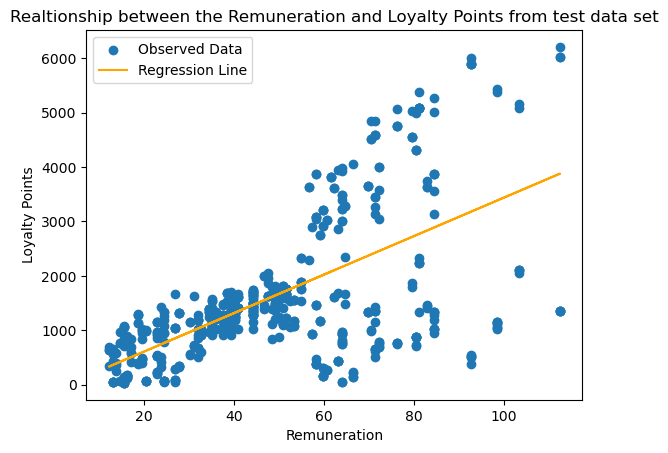

In [100]:
# Plot the graph with a regression line. (TEST DATA)
plt.scatter(X2_test['remuneration'], y_test, label='Observed Data')
plt.plot(X2_test['remuneration'], y2_pred, color='orange', label='Regression Line')

plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Realtionship between the Remuneration and Loyalty Points from test data set')
plt.legend()
plt.show()

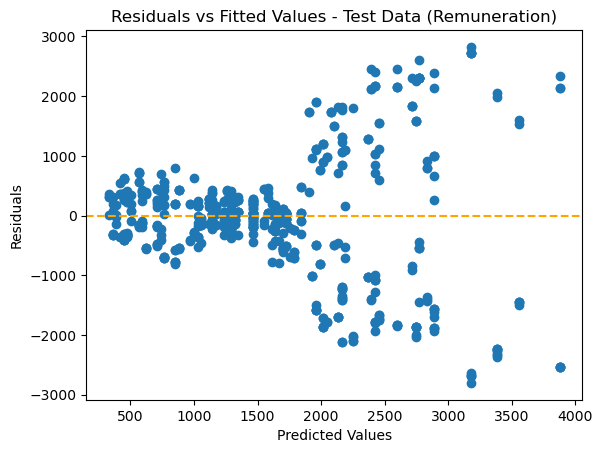

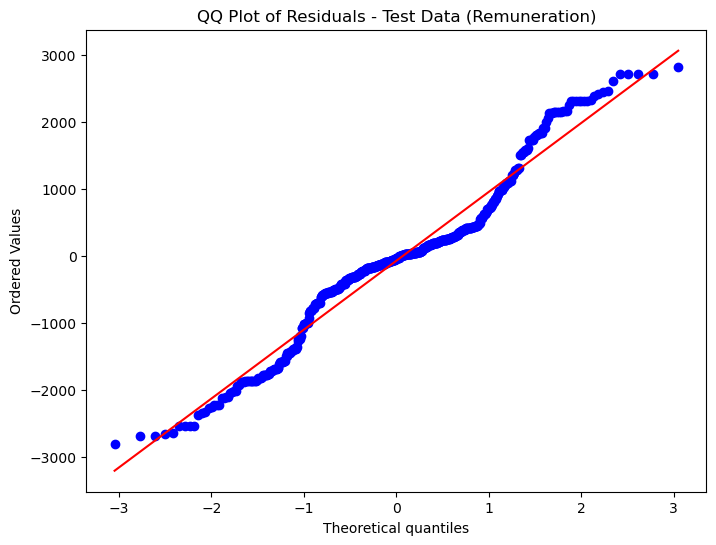

In [102]:
# ---- Assumption Checks ----

# Residuals Plot (Residuals vs Fitted Values)

residuals = y_test - y2_pred

plt.scatter(y2_pred, residuals)
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values - Test Data (Remuneration)')
plt.show()

# Plot the QQ plot for the residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)  
plt.title('QQ Plot of Residuals - Test Data (Remuneration)')
plt.show()

##  Observations and insights

The R-squared value is 0.403, meaning that about 40.3% of the variance in loyalty points can be explained by remuneration.
The coefficient for remuneration is 35.45, indicating that a £1,000 increase in remuneration leads to an increase of approximately 35 loyalty points.
The p-value is highly significant (p < 0.001), suggesting remuneration is a significant predictor of loyalty points.

Remuneration has a significant positive effect on loyalty points, implying that higher-paid customers tend to accumulate more loyalty points. This could indicate that higher-income customers are more engaged with the loyalty program.

Assumption Checks:
Similar to the spending score model, the residual plot suggests a good fit with some signs of heteroscedasticity.
The residuals appear normally distributed based on the QQ plot.

### 5c) Age vs Loyalty Points

In [109]:
# Define variables.
X3 = reviews_clean['age']
y = reviews_clean['loyalty_points']

# Splitting data into train and test sets (70% train, 30% test)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

# Adding a constant to the independent variable (for the intercept)
X3_train = sm.add_constant(X3_train)

# Create model and print summary of metrics.
model_3 = sm.OLS(y_train, X3_train).fit()

# Displaying the Train model 3
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.127
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.145
Time:                        17:06:45   Log-Likelihood:                -12010.
No. Observations:                1400   AIC:                         2.402e+04
Df Residuals:                    1398   BIC:                         2.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1730.4452    105.465     16.408      0.0

In [111]:
# Manual extraction of the predicted values on the test set.
X3_test =sm.add_constant(X3_test)  
y3_pred = model_3.predict(X3_test)  

print("Predicted Values(first 5 predictions on model_3 Test data):")
print(y3_pred.head())

Predicted Values(first 5 predictions on model_3 Test data):
1860    1465.833511
353     1590.789022
1333    1609.164832
905     1645.916453
1289    1550.362239
dtype: float64


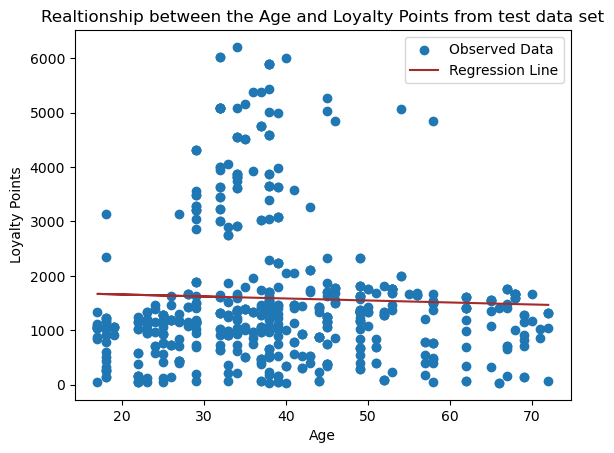

In [113]:
# Plot the graph with a regression line. (TEST DATA)
plt.scatter(X3_test['age'], y_test, label='Observed Data')
plt.plot(X3_test['age'], y3_pred, color='brown', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Realtionship between the Age and Loyalty Points from test data set')
plt.legend()
plt.show()


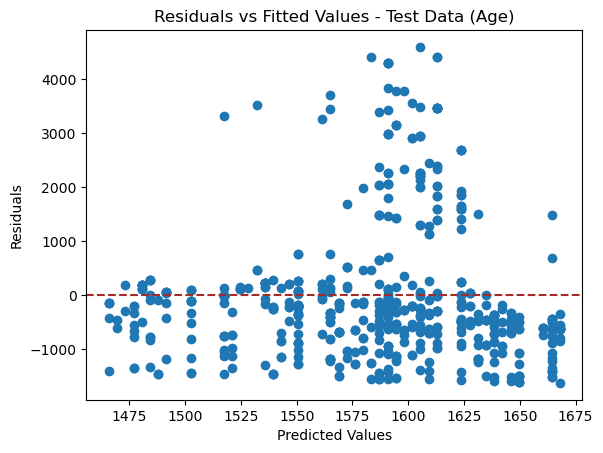

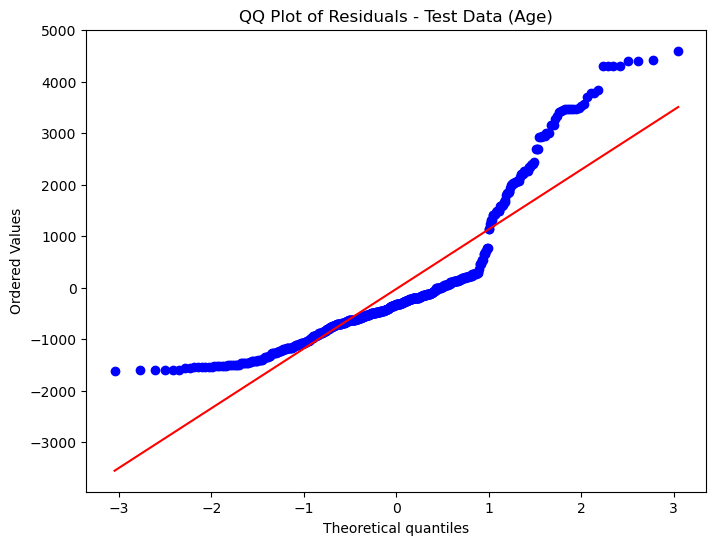

In [125]:
# ---- Assumption Checks ----

# Residuals Plot (Residuals vs Fitted Values)

residuals = y_test - y3_pred

plt.scatter(y3_pred, residuals)
plt.axhline(y=0, color='brown', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values - Test Data (Age)')
plt.show()

# Plot the QQ plot for the residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)  
plt.title('QQ Plot of Residuals - Test Data (Age)')
plt.show()

##  Observations and insights

The R-squared value is 0.002, which means that only 0.2% of the variance in loyalty points is explained by age.
The coefficient for age is -3.67, indicating a very slight negative relationship between age and loyalty points, but the p-value is not significant (p = 0.145).

Age does not appear to be a significant predictor of loyalty points. There is no clear relationship between a customer's age and how many loyalty points they accumulate.

Assumption Checks:
The residuals show signs of non-normality and heteroscedasticity, further indicating that age is not a good predictor for loyalty points.

## 6. Multi Linear Regression

**Fit MLR OLS Model on Training Data**

In [133]:
# Define the Predictor (X) and Outcome (y) Variable
X = reviews_clean[['spending_score', 'remuneration', 'age']]
y = reviews_clean['loyalty_points']

# Splitting data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a Constant (Intercept) to the Model
X_train = sm.add_constant(X_train)

# Fit the Multiple Linear Regression Model
model_mlr_train = sm.OLS(y_train, X_train).fit()

# Display the mlr model
print(model_mlr_train .summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2513.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:07:10   Log-Likelihood:                -10711.
No. Observations:                1400   AIC:                         2.143e+04
Df Residuals:                    1396   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2185.5298     61.684    -35.

In [135]:
regression_table = pd.DataFrame({
    'Coefficient': model_mlr_train .params,
    'Standard Error': model_mlr_train .bse,
    't-value': model_mlr_train .tvalues,
    'p-value': model_mlr_train .pvalues
})
print("MLR Model(Train)- Regression Table:\n", regression_table)

MLR Model(Train)- Regression Table:
                 Coefficient  Standard Error    t-value        p-value
const          -2185.529812       61.684259 -35.430916  1.100173e-196
spending_score    33.721735        0.538434  62.629338   0.000000e+00
remuneration      34.478682        0.591357  58.304313   0.000000e+00
age               10.766430        1.026811  10.485308   8.200011e-25


**OLS Assumptions and testing the reliablity of MLR Model (Train Data)**

1)Assumption - LINEARITY : The relationship between the dependent variable y and the independent variables (X1,X2,X3) is linear.

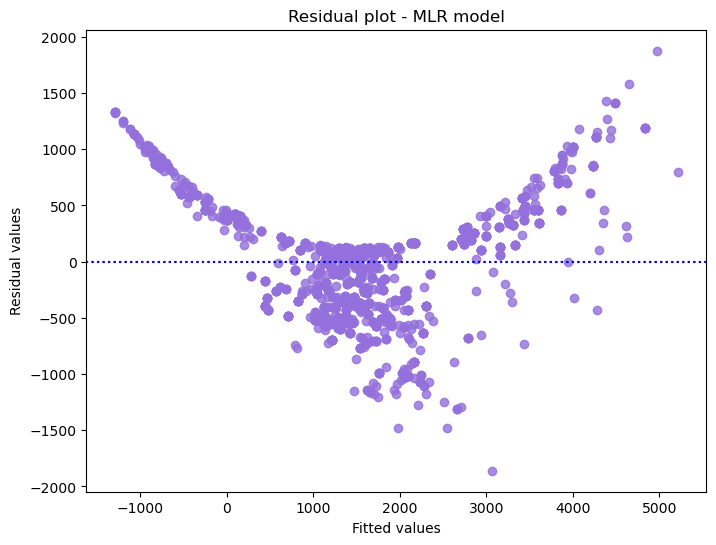

In [139]:
import numpy as np

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=model_mlr_train.fittedvalues, y=model_mlr_train.resid, color='#9370DB')  
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.title('Residual plot - MLR model')

# Add a blue dotted line at y=0 (to represent no residual deviation)
plt.axhline(0, color='blue', linestyle='dotted')

plt.savefig('Residual plot - MLR model')
plt.show()


The residuals should be randomly scattered around zero. However, there is a curve suggesting the relationship between the dependent variable and the independent variables is non-linear.

2) Assumption: Homoscedasticity (Constant Variance) - The variance of the residuals is constant across all levels of the independent variables.

In [143]:
# Assessing Homoscedasticity using Breusch-Pagan Test

from statsmodels.stats.diagnostic import het_breuschpagan

_, pval, __, f_pval = het_breuschpagan(model_mlr_train .resid, model_mlr_train .model.exog)
print('Breusch-Pagan test p-value:', pval)


Breusch-Pagan test p-value: 5.034558891749626e-07


The p-value is extremely low (5.034558891749626e-07), which means there is strong evidence against the null hypothesis of homoscedasticity. This means the model's residuals exhibit heteroscedasticity. This indicates that the variance of the errors is not constant, which can lead to inefficient estimates and incorrect conclusions about the significance of predictors in this  model.

3)  Assumption : Independence of Errors - The residuals (errors) are independent of each other, which means there is no correlation between the residuals.

In [147]:
from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistic:', durbin_watson(model_mlr_train .resid))


Durbin-Watson statistic: 2.0399327091545896


4) Assumption: Normality of Residuals - The residuals should be approximately normally distributed

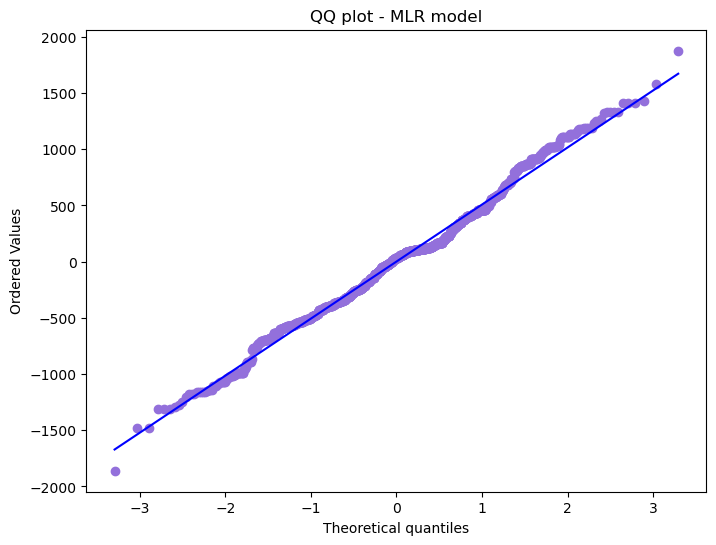

In [150]:
# Q-Q Plot to visually assess whether the residuals follow a normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(model_mlr_train.resid, dist="norm", plot=plt)


plt.gca().get_lines()[0].set_color('#9370DB') 
plt.gca().get_lines()[1].set_color('blue')  

plt.title('QQ plot - MLR model')

plt.savefig('QQ plot - MLR model')
plt.show()


The points lie along the 45-degree line hence the residuals are normally distributed.

5) Assumption: No Multicollinearity - The independent variables (X1,X2,X3) should not be too highly correlated with each other.

In [154]:
# Variance Inflation Factor (VIF) to  quantifiy the level of multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature in the training set
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Display the VIF for each feature
print(vif_data)


          feature        VIF
0           const  20.521069
1  spending_score   1.060234
2    remuneration   1.000930
3             age   1.059859


The Variance Inflation Factor (VIF) is a measure used to detect the presence and severity of multicollinearity in a regression model. 

Interpreting the VIF Values:
- VIF = 1: No correlation between this predictor and the other predictors in the model.
- 1 < VIF < 5: Moderately correlated predictors, but not severe enough to be problematic.
- VIF > 5: Indicates potentially problematic multicollinearity.
- VIF > 10: Suggests severe multicollinearity, which is likely to be problematic and may require further investigation or correction.

The VIF values for all three predictors are below 5, which is generally considered acceptable. This means that multicollinearity is present but not at a level that should cause serious concern. 

## 7. Evaluate the model

**Making Predictions and Evaluating on Test Data**

In [159]:
# Ensure X_test is consistent with whats obtained from train_test_split
X_test = sm.add_constant(X_test)  

# Using trained model to predict on the test set
y_pred = model_mlr_train.predict(X_test)

print("Predicted Values(first 5 predictions on model_mlr Test data):")
print(y_pred .head())


Predicted Values(first 5 predictions on model_mlr Test data):
1860    -427.284331
353     2991.702885
1333    2599.626945
905     1231.307143
1289    1533.031183
dtype: float64


In [161]:
# Calculate evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared on Test Data: {r2}")
print(f"Mean Squared Error on Test Data: {mse}")
print(f"Mean Absolute Error on Test Data: {mae}")

R-squared on Test Data: 0.8300534613807654
Mean Squared Error on Test Data: 275278.8844648306
Mean Absolute Error on Test Data: 398.0269061972347


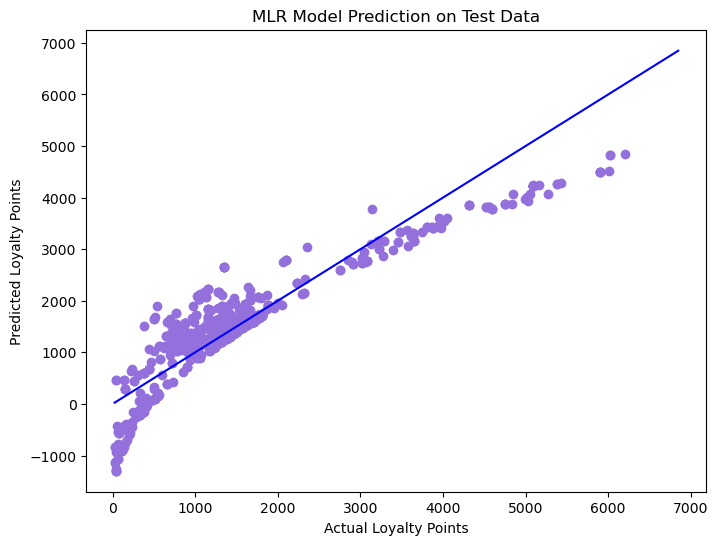

In [171]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#9370DB')  # Violet data points
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('MLR Model Prediction on Test Data')

# Add a line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue')

plt.savefig('MLR Model Prediction on Test Data')

plt.show()


##  Observations and insights

The R-squared value is 0.83, indicating that 83% of the variance in loyalty points can be explained by the combined effect of spending score, remuneration, and age.

The coefficients are:
- Spending score: 33.72 (highly significant, p < 0.001)
- Remuneration: 34.48 (highly significant, p < 0.001)
- Age: 10.77 (significant, p < 0.001)

The combination of spending score and remuneration provides a strong prediction of loyalty points. Age is also a significant predictor in this model, although its individual effect was not strong on its own. Spending score and remuneration are the most important variables for predicting loyalty points.


Assumption Checks:
- Linearity: The relationship between predictors and the outcome is mostly linear, although there are signs of non-linearity.
- Homoscedasticity: The Breusch-Pagan test indicates heteroscedasticity (p-value = 5.03e-07), suggesting that the model’s residuals have non-constant variance.
- Independence of Errors: The Durbin-Watson statistic is 2.03, indicating no significant autocorrelation in the residuals.
- Normality of Residuals: The QQ plot suggests that the residuals are normally distributed.
- Multicollinearity: The VIF values for all variables are below 5, indicating no serious multicollinearity issues.

Key Findings: Spending score and remuneration are the key drivers of loyalty points accumulation. Age has a much smaller impact.

# Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.

## 1. Load and prepare the data

In [175]:
# Import all the necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Settings for the notebook.
plt.rcParams['figure.figsize'] = [15, 10]

In [177]:
# Create your new DataFrame containing clean data.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   remuneration     2000 non-null   float64
 3   spending_score   2000 non-null   int64  
 4   loyalty_points   2000 non-null   int64  
 5   education        2000 non-null   object 
 6   product_code     2000 non-null   int64  
 7   customer_review  2000 non-null   object 
 8   review_summary   2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [179]:
# View the DataFrame : 1st 5 and last 5 rows
pd.concat([df2.head(),df2.tail()])

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product_code                                    customer_review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                         review_summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game

In [180]:
# Checking for missing values?
missing_values = df2.isnull().sum()
print(missing_values)

gender             0
age                0
remuneration       0
spending_score     0
loyalty_points     0
education          0
product_code       0
customer_review    0
review_summary     0
dtype: int64


In [183]:
# Determining unique values of the categorical variables
for c in ['gender','education','review_summary']:
    print(c)
    print(df2[c].unique())  

gender
['Male' 'Female']
education
['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']
review_summary
['The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...'
 "Another worthless Dungeon Master's screen from GaleForce9"
 'pretty, but also pretty useless' ...
 'Great game to keep the mind active' 'A great mind game'
 'The perfect word game for mixed ages (with Mom']


Note: Decided to leave gender coloumns as it is as both gendres have aprox balanced obeservations. Alaso decided to remove/drop review columns. 

## 2. Update variables

In [187]:
# Specify the DataFrame column and add/determine the values.
df2['gender'].value_counts() 

gender
Female    1120
Male       880
Name: count, dtype: int64

Note : Gender Breakdown: This seems fairly balanced with about 56% Female and 44% Male. The difference here isn't very concerning

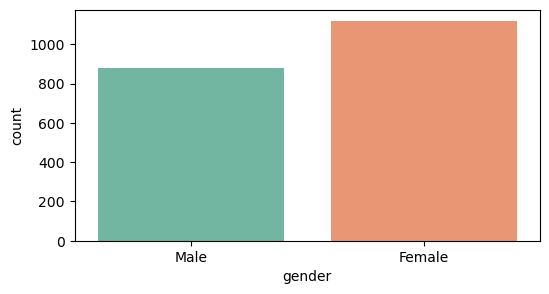

In [190]:
# Specify the DataFrame column and add/determine the values.
df2['gender'].value_counts() 

import seaborn as sns
import matplotlib.pyplot as plt

# Plot for 'gender' column 
# plot graph for selected categorical variables
plt.rcParams['figure.figsize'] = [6, 3]
sns.countplot(x=df2['gender'], palette="Set2")  
plt.show()


Note: Decided not to balance Gender varaible as counts are similar. 

In [193]:
# Specify the DataFrame column and add/determine the values.
df2['education'].value_counts() 

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

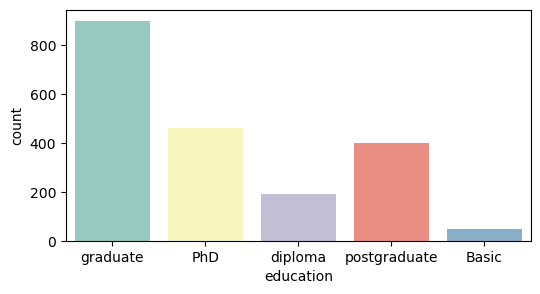

In [195]:
# plot graph for selected categorical variables-'education'
plt.rcParams['figure.figsize'] = [6, 3]
sns.countplot(x=df2['education'], palette="Set3")  
plt.show()


note:

In [198]:
# Aggregate the 'education' column
education_map = {
    'graduate': 'Graduate',
    'PhD': 'Post-Graduate',
    'postgraduate': 'Post-Graduate',
    'diploma': 'Basic-Diploma',
    'Basic': 'Basic-Diploma',
}
# Apply the mapping to the education column
df2['education'] = df2['education'].map(education_map)

# Check the new distribution after aggregation
print(df2['education'].value_counts())

education
Graduate         900
Post-Graduate    860
Basic-Diploma    240
Name: count, dtype: int64


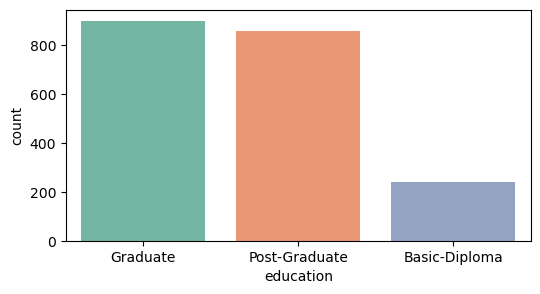

In [200]:
# plot graph for the aggregated the 'education' column
plt.rcParams['figure.figsize'] = [6, 3]
sns.countplot(x=df2['education'], palette="Set2")  
plt.show()

Note: Various levels of education are aggregated into broader categories to simplify the model. Specifically,  ‘diploma’ and ‘Basic’ are combined into ‘Basic-Diploma’, and  ‘PhD’ and 'postgraduate’ grouped into ‘Post-Graduate’. This reduces the number of distinct categories, helping the decision tree to focus on more meaningful splits.

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Specify continuous feature columns for VIF calculation
continuous_cols = ['age', 'remuneration', 'spending_score']

# Create a temporary DataFrame 'X_temp' for VIF with only continuous variables from the original df2
X_temp = df2[continuous_cols]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(len(X_temp.columns))]

print("\nMulticollinearity Check (VIF):")
print(vif_data)



Multicollinearity Check (VIF):
          feature       VIF
0             age  4.299621
1    remuneration  4.211139
2  spending_score  3.285346


Note: These VIF values are below the threshold of 5, hence will be used in decision tree model.

In [206]:
# Create a new DataFrame 'df2_new' excluding unwanted columns
df2_new = df2.drop(['product_code', 'customer_review', 'review_summary'], axis=1, errors='ignore')

# Create dummy variables for 'gender' and 'education' in 'df2_new' without dropping the first category
df2_new = pd.get_dummies(df2_new, columns=['gender', 'education'], drop_first=False)

# Redefine X (independent variables) by excluding the target variable 'loyalty_points'
X = df2_new.drop('loyalty_points', axis=1)

# Define y (target variable)
y = df2_new['loyalty_points']

# Display the first few rows of X to confirm that unnecessary columns have been removed
print("Columns in X after cleanup and dummy encoding:")
print(X.columns)

Columns in X after cleanup and dummy encoding:
Index(['age', 'remuneration', 'spending_score', 'gender_Female', 'gender_Male',
       'education_Basic-Diploma', 'education_Graduate',
       'education_Post-Graduate'],
      dtype='object')


Note: Dummy encoding is applied to the categorical variables: gender and education. This process converts these categories into binary variables so they can be used in the decision tree, which requires numeric inputs.

In [209]:
# Display the first few rows of y
print("\nY (Target Variable - Loyalty Points):")
print(y.head())


Y (Target Variable - Loyalty Points):
0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64


Note: These VIF values are below the threshold of 5, hence will be used in decision tree and random forest models.

## 3. Create train and test data sets.

In [213]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Note: The data were split into training and test sets with a 70/30 ratio, using random_state=42 for reproducibility. This ensures that I can measure the model's performance on unseen data (test set) after training it on the training data.

## 4. Create Decision tree regressor

In [217]:
from sklearn.tree import DecisionTreeRegressor

# Create your decision tree regressor
regressor= DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

Note: A basic decision tree regressor is created and fit to the training data. This is an unpruned model, meaning the tree will grow until it perfectly fits the training data.

## 5. Evaluate the model

In [221]:
from sklearn.metrics import r2_score

# Make predictions on train data 
y_train_pred = regressor.predict(X_train)

# Make predictions on test data 
y_test_pred = regressor.predict(X_test)

# Print first 5 predictions using array slicing
print("Predicted Values (first 5 predictions on Train data):")
print(y_train_pred[:5])

print("Predicted Values (first 5 predictions on Test data):")
print(y_test_pred[:5])

Predicted Values (first 5 predictions on Train data):
[ 338. 4007. 3221. 1152. 1665.]
Predicted Values (first 5 predictions on Test data):
[  62. 3398. 2750. 1122. 1622.]


**R-squared Value**

In [224]:
# Evaluate the model using R-squared for training data 
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model using R-squared for testing data 
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared on Training Data: {r2_train}")
print(f"R-squared on Test Data: {r2_test}")


R-squared on Training Data: 1.0
R-squared on Test Data: 0.9950943326488574


Note: 
- Training Data R² = 1.0: 
The model perfectly fits the training data, but this is often a sign of overfitting.
- Test Data R² = 0.995: This is very good , indicating that the model generalises well to unseen data and explains almost 99.5% of the variance in loyalty points.

- The model is highly accurate on both training and test data, though the perfect R² on the training set signals potential overfitting,  which needs to be controlled.

**Mean Squared Error (MSE)**

In [228]:
from sklearn.metrics import mean_squared_error

# Evaluate the model using MSE for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Evaluate the model using MSE for testing data
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Test Data: {mse_test}")


Mean Squared Error on Training Data: 0.0
Mean Squared Error on Test Data: 7946.185


Note:

- Training Data MSE = 0.0:
  This confirms the model is overfitting to the training data, as it is making no errors in predicting the training set.
- Test Data MSE = 7946.19:
  This is still a very low error, indicating that the model performs well on the test set despite some errors.

- The very low MSE on the test set shows that the model is making accurate predictions, although there’s a significant difference from the perfect 0.0 MSE on the training data.

**Mean Absolute Error (MAE)**

In [232]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate MAE for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error on Training Data: {mae_train}")
print(f"Mean Absolute Error on Test Data: {mae_test}")


Mean Absolute Error on Training Data: 0.0
Mean Absolute Error on Test Data: 30.901666666666667


- Training Data MAE = 0.0: 
  This shows perfect prediction on the training set, reinforcing the model's overfitting.
- Test Data MAE = 30.90:
  This means that on average, the model’s predictions deviate by about 31 loyalty points from the actual values.
- The MAE on the test set is low, showing that the model performs well, but the exact amount of error (around 31 loyalty points) is something to consider , if more precise predictions are needed.

**Cross-Validation**

In [236]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {cv_scores.mean()}")


Cross-Validation R-squared Scores: [0.99467209 0.9897538  0.99266949 0.99231907 0.98695738]
Mean Cross-Validation R-squared: 0.9912743651185831


Note:
- Cross-validation helps assess how well the model will generalize to new data by splitting the training set into 5 different folds, each used as both training and validation data. This prevents overfitting by ensuring the model isn’t overly tuned to a single set of data.

- The cross-validation R² scores range from 0.986 to 0.994, with a mean of 0.991. This shows that the model performs consistently across different subsets of the training data.

**Feature Importance**

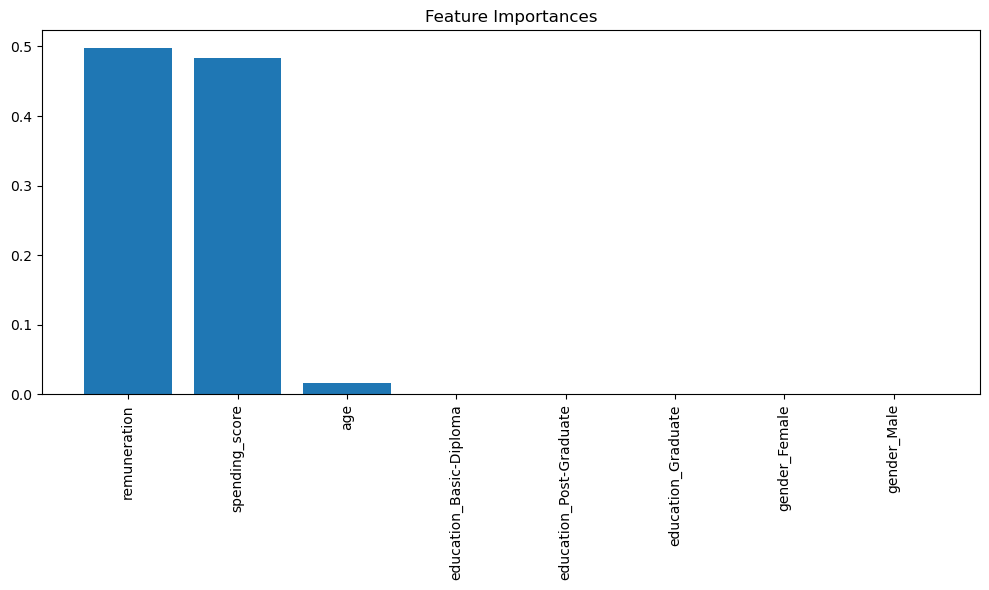

In [240]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


**Pre-Pruning with max_depth and min_samples_leaf**

In [243]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pre-pruning: Set constraints
pre_pruned_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

# Fit the model with pre-pruning
pre_pruned_regressor.fit(X_train, y_train)

# Evaluate performance on the test set after pruning
y_test_pred_pre_pruned = pre_pruned_regressor.predict(X_test)

# Calculate performance metrics
mse_test_pre_pruned = mean_squared_error(y_test, y_test_pred_pre_pruned)
mae_test_pre_pruned = mean_absolute_error(y_test, y_test_pred_pre_pruned)
r2_test_pre_pruned = r2_score(y_test, y_test_pred_pre_pruned)

print(f"Pre-pruned MSE on Test Data: {mse_test_pre_pruned}")
print(f"Pre-pruned MAE on Test Data: {mae_test_pre_pruned}")
print(f"Pre-pruned R-squared on Test Data: {r2_test_pre_pruned}")


Pre-pruned MSE on Test Data: 63596.60984725053
Pre-pruned MAE on Test Data: 178.3357315110039
Pre-pruned R-squared on Test Data: 0.9607379122722397


**Pre-Pruning with Cost Complexity Pruning (ccp_alpha)**

In [246]:
# Get the effective alphas and corresponding trees
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Initialize list to store trees and R2 scores
trees = []
r2_scores = []

# Loop over alpha values to find the best pruned tree
for ccp_alpha in ccp_alphas:
    pruned_regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    pruned_regressor.fit(X_train, y_train)
    y_test_pred_pruned = pruned_regressor.predict(X_test)
    r2_scores.append(r2_score(y_test, y_test_pred_pruned))
    trees.append(pruned_regressor)

# Find the alpha with the best R-squared score
best_alpha_idx = np.argmax(r2_scores)
best_alpha = ccp_alphas[best_alpha_idx]
best_pruned_tree = trees[best_alpha_idx]

print(f"Best alpha: {best_alpha}")
print(f"Best R-squared after pruning: {r2_scores[best_alpha_idx]}")


Best alpha: 2.4771428571428573
Best R-squared after pruning: 0.9951358665741629


In [247]:
# Train the final tree using the best alpha
final_pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_pruned_tree.fit(X_train, y_train)

# Evaluate on test data
y_test_pred_final_pruned = final_pruned_tree.predict(X_test)
mse_test_final_pruned = mean_squared_error(y_test, y_test_pred_final_pruned)
mae_test_final_pruned = mean_absolute_error(y_test, y_test_pred_final_pruned)
r2_test_final_pruned = r2_score(y_test, y_test_pred_final_pruned)

print(f"Final Pruned MSE on Test Data: {mse_test_final_pruned}")
print(f"Final Pruned MAE on Test Data: {mae_test_final_pruned}")
print(f"Final Pruned R-squared on Test Data: {r2_test_final_pruned}")


Final Pruned MSE on Test Data: 7878.9084745794535
Final Pruned MAE on Test Data: 33.91982260945367
Final Pruned R-squared on Test Data: 0.9951358665741629


In [248]:
# Performance comparison table
performance_comparison = {
    'Model': ['Pre-Pruned', 'Final Pruned'],
    'MSE': [mse_test_pre_pruned, mse_test_final_pruned],
    'MAE': [mae_test_pre_pruned, mae_test_final_pruned],
    'R²': [r2_test_pre_pruned, r2_test_final_pruned]
}

import pandas as pd
performance_df = pd.DataFrame(performance_comparison)
print(performance_df)


          Model           MSE         MAE        R²
0    Pre-Pruned  63596.609847  178.335732  0.960738
1  Final Pruned   7878.908475   33.919823  0.995136


Note: The comparison table shows that after pruning, both the MSE and MAE significantly dropped , and the R-squared improved. This indicates that pruning was effective in creating a more accurate and generalizable model.

## 5. plot final model.

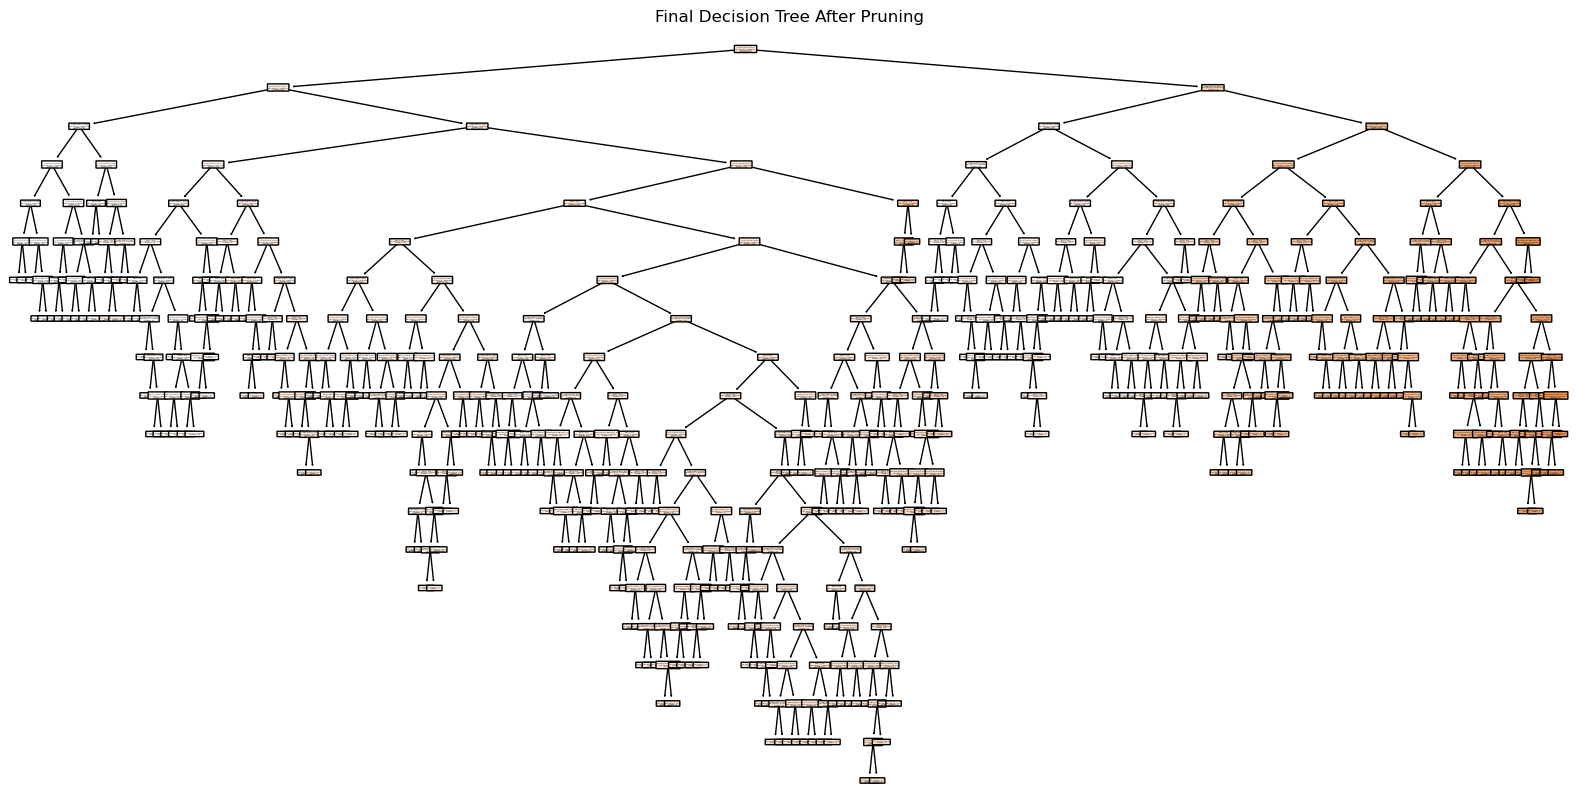

In [254]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the final pruned tree
plt.figure(figsize=(20, 10))
plot_tree(final_pruned_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Final Decision Tree After Pruning")

plt.savefig('final tree')
plt.show()

In [255]:
# Tree depth and number of leaves in the final tree

print("Tree depth =", final_pruned_tree.get_depth())
print("Number of Leaves =",final_pruned_tree.get_n_leaves())

Tree depth = 19
Number of Leaves = 311


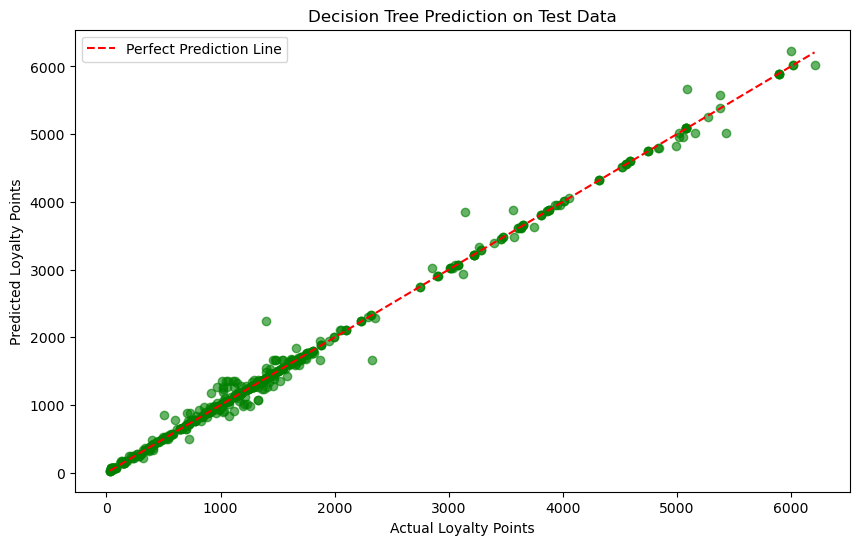

In [277]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted loyalty points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_final_pruned, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', 
         linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Decision Tree Prediction on Test Data')
plt.legend()

# Save the plot with a valid filename (no spaces)
plt.savefig('actual_vs_predicted_loyalty_points.png', dpi=300)  

# Show the plot
plt.show()



Note

- The data points in this plot mostly align closely with the red dashed line, which represents a perfect prediction (where actual values exactly match predicted values).
- There is a good linear relationship between actual and predicted values, especially for loyalty points between 1000 and 5000.
- There are some deviations or outliers visible at higher and lower ends (close to 0 and above 5000), where the predicted values do not align perfectly with the actual values.

Insight:

- The strong linearity of the plot shows that the final pruned model is highly accurate in predicting loyalty points for most of the dataset, particularly within the mid-range values.
- The deviations at the extremes (lower and higher points) indicate that the model struggles a bit with these points. The spread might suggest either noise or a limitation in how well the model captures patterns in customers with particularly low or high loyalty points

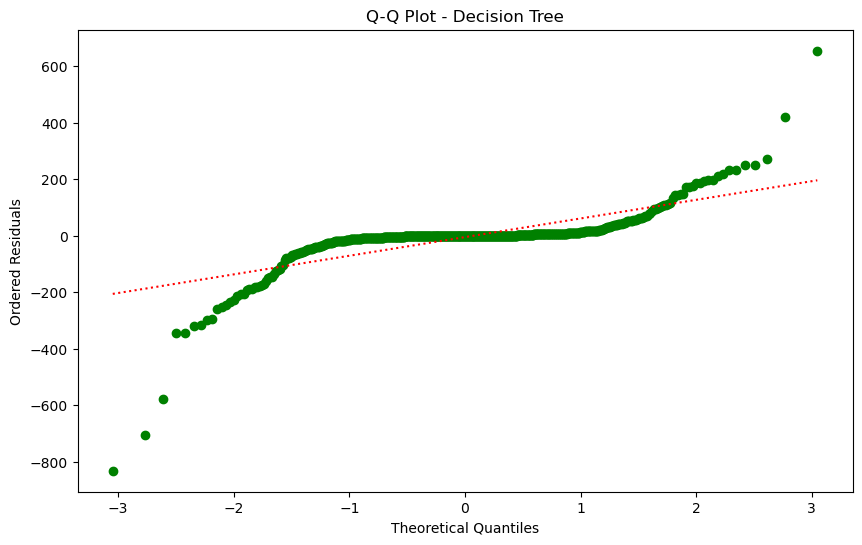

In [287]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals (Actual - Predicted)
residuals = y_test - y_test_pred_final_pruned

# Q-Q Plot to assess if residuals follow a normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)  # Q-Q plot

# Customize the plot elements
plt.gca().get_lines()[0].set_color('green') 
plt.gca().get_lines()[1].set_color('red')   
plt.gca().get_lines()[1].set_linestyle('dotted')  

# Set plot title and labels
plt.title('Q-Q Plot - Decision Tree')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')

# Save the plot with a valid filename
plt.savefig('qq_plot_residuals_decision_tree.png', dpi=300)

# Show the plot
plt.show()


Note:
- The Q-Q plot shows significant deviation from the red normality line, especially in the tails.
This suggests that the residuals do not follow a normal distribution.
- Aslo it shows heavy tails (extreme points far from the line), implying the presence of outliers or extreme residuals.
These extreme values suggest that the model might be less accurate for customers with very low or very high loyalty points.

- The residuals form an S-shaped pattern in the Q-Q plot, pointing to non-linear relationships in the data.
- This indicates potential skewness or asymmetry in the distribution of residuals, which the decision tree model may not capture well.


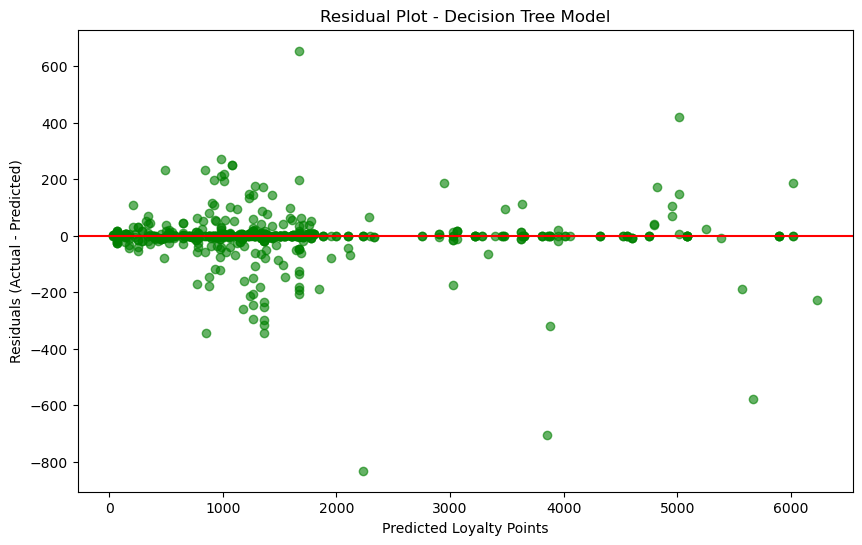

In [279]:
# Residuals (Actual - Predicted)
residuals = y_test - y_test_pred_final_pruned

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_final_pruned, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='-')
plt.xlabel('Predicted Loyalty Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot - Decision Tree Model')

# Save the plot before showing it
plt.savefig('residual_plot.png', dpi=300) 

# Show the plot
plt.show()



Note

- The residual plot shows that residuals are scattered randomly around the zero line, which is a good indication that the model's errors are not systematically biased.
- However, there is a wider spread of residuals for predicted loyalty points below 2000, with errors ranging from approximately -400 to +400. This suggests there may be some variability in the model's accuracy for this range.
- For predicted loyalty points above 2000, the residuals tend to be much closer to zero, indicating better predictive accuracy in the mid-to-high loyalty point range

Insight:

- The random scatter of residuals around zero confirms that the model is not systematically over- or under-predicting.
- The larger spread of residuals for loyalty points below 2000 could indicate that the model might be less accurate in this range. However, this needs to be further investigated to confirm whether these larger residuals significantly impact the model’s overall performance in this range.

**Performance Comparison for Low vs. High Loyalty Points**

In [688]:
# Create a DataFrame to easily filter predictions and residuals
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_final_pruned,
    'Residual': residuals
})

# Filter for predicted loyalty points < 2000
low_loyalty_df = results_df[results_df['Predicted'] < 2000]

# Filter for predicted loyalty points >= 2000
high_loyalty_df = results_df[results_df['Predicted'] >= 2000]

# Calculate performance metrics for low predicted loyalty points (below 2000)
low_mse = mean_squared_error(low_loyalty_df['Actual'], low_loyalty_df['Predicted'])
low_mae = mean_absolute_error(low_loyalty_df['Actual'], low_loyalty_df['Predicted'])
low_r2 = r2_score(low_loyalty_df['Actual'], low_loyalty_df['Predicted'])

print(f"Performance for Low Predicted Loyalty Points (Below 2000):")
print(f"MSE: {low_mse}")
print(f"MAE: {low_mae}")
print(f"R²: {low_r2}")

# Calculate performance metrics for high predicted loyalty points (2000 and above)
high_mse = mean_squared_error(high_loyalty_df['Actual'], high_loyalty_df['Predicted'])
high_mae = mean_absolute_error(high_loyalty_df['Actual'], high_loyalty_df['Predicted'])
high_r2 = r2_score(high_loyalty_df['Actual'], high_loyalty_df['Predicted'])

print(f"\nPerformance for High Predicted Loyalty Points (2000 and Above):")
print(f"MSE: {high_mse}")
print(f"MAE: {high_mae}")
print(f"R²: {high_r2}")

# Optionally, print a few rows of actual and predicted values for verification
print("\nSample of Predictions for Low Loyalty Points:")
print(low_loyalty_df.head())


Performance for Low Predicted Loyalty Points (Below 2000):
MSE: 5339.265073406475
MAE: 30.983893314908865
R²: 0.9787818380317204

Performance for High Predicted Loyalty Points (2000 and Above):
MSE: 19318.953520230218
MAE: 47.14497200047658
R²: 0.9836152009716387

Sample of Predictions for Low Loyalty Points:
      Actual    Predicted   Residual
1860      59    64.209302  -5.209302
905     1122  1122.000000   0.000000
1289    1622  1620.750000   1.250000
1273    1605  1605.000000   0.000000
938      266   284.500000 -18.500000


Note:
- The model performs well for low predicted loyalty points, with a relatively low MSE and MAE. An R² of 0.9788 is very strong, indicating that the model explains approximately 97.88% of the variance in this range.
- For high predicted loyalty points, the MSE is much higher at 19,318.95, and the MAE is larger as well (47.14). The R² of 0.9836 is still excellent, meaning that the model explains approximately 98.36% of the variance, but the error values are noticeably larger in this range.

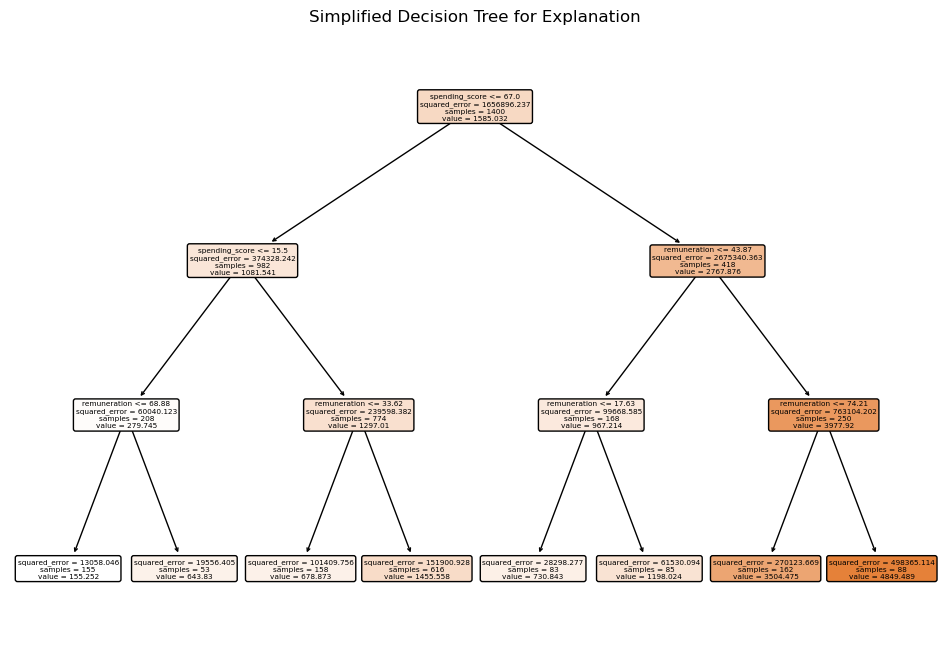

In [675]:
# Build a smaller tree for explanation purposes
small_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
small_tree.fit(X_train, y_train)

# Plot the smaller tree
plt.figure(figsize=(12, 8))
plot_tree(small_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Simplified Decision Tree for Explanation")
plt.show()


## Final Insights and observations

- Spending score and remuneration are the most significant predictors of loyalty points. These insights can guide marketing efforts to focus on high-spending and high-income customers.
- Pruning the decision tree model was crucial in reducing overfitting and improving generalization without sacrificing much accuracy.
- The final pruned model performs exceptionally well with a high R² value and low MSE and MAE, making it a reliable tool for predicting loyalty points.


#  Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [504]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [506]:
# Load the CSV file(s) as df2.
# Create your new DataFrame containing clean data.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   remuneration     2000 non-null   float64
 3   spending_score   2000 non-null   int64  
 4   loyalty_points   2000 non-null   int64  
 5   education        2000 non-null   object 
 6   product_code     2000 non-null   int64  
 7   customer_review  2000 non-null   object 
 8   review_summary   2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [507]:
# View the DataFrame : 1st 5 and last 5 rows
pd.concat([df2.head(),df2.tail()])

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product_code                                    customer_review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                         review_summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game

In [510]:
# Drop unnecessary columns.
df3 = df2.drop(columns=['gender','age','loyalty_points', 'education', 'product_code', 
                        'customer_review', 'review_summary'])

# View DataFrame.
df3

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [512]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [514]:
# Descriptive statistics.
df3.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

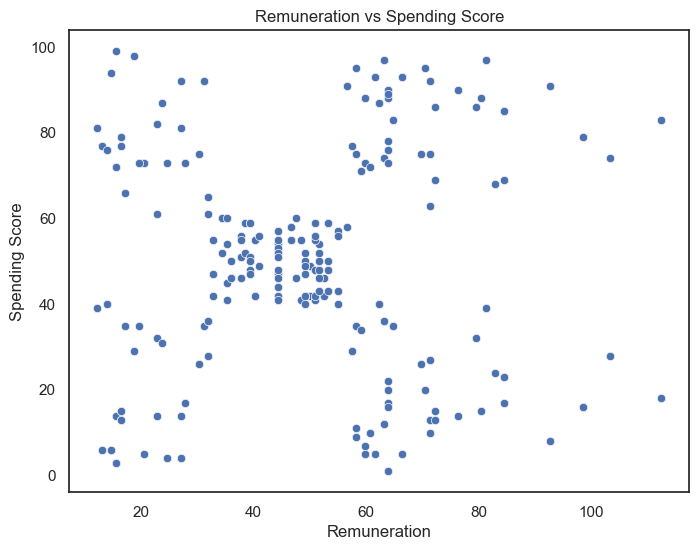

In [517]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(8, 6))
sns.scatterplot(x= 'remuneration',
                y= 'spending_score',
                data= df3)

# set the titles for the plot
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.title("Remuneration vs Spending Score")

# Save the plot 
plt.savefig('"Remuneration vs Spending Score".png')
            
# display the plot
plt.show()


Note: 

- This is a raw scatterplot of the data points.
  
- There’s no obvious clear segmentation of the data based on this plot alone, but there are visible concentrations around certain areas. - - e:g: clusters around mid-range remuneration and mid-range spending scores. 

- clustering is necessary to properly segment this data and make the relationships more explicit.

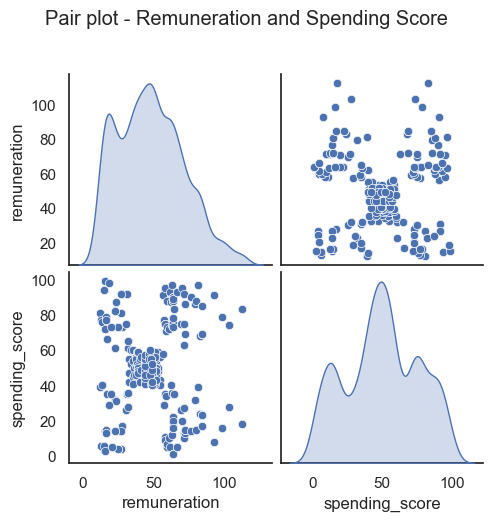

In [519]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]
sns.pairplot(df3, 
             vars=x, diag_kind='kde')

# Adjust the space between the title and the plot
plt.subplots_adjust(top=0.9)

# set the titles for the plot
plt.suptitle('Pair plot - Remuneration and Spending Score', y=1.03)

# Save the plot
plt.savefig('Pair plot - Remuneration and Spending Score.png')

# display the plot
plt.show()


## 3. Elbow and silhoutte methods

In [523]:
# Normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3[['remuneration', 'spending_score']])


Note:
This was done to ensure that remuneration (with a standard deviation of £23.12k) and spending score (standard deviation of 26.09), which have significantly different ranges, contribute equally to the K-means clustering process. Without normalization, the larger range of remuneration would dominate the calculations, leading to imbalanced clusters that prioritise income over spending behavior

**Elbow method to find optimal optimal number of clusters(k)**

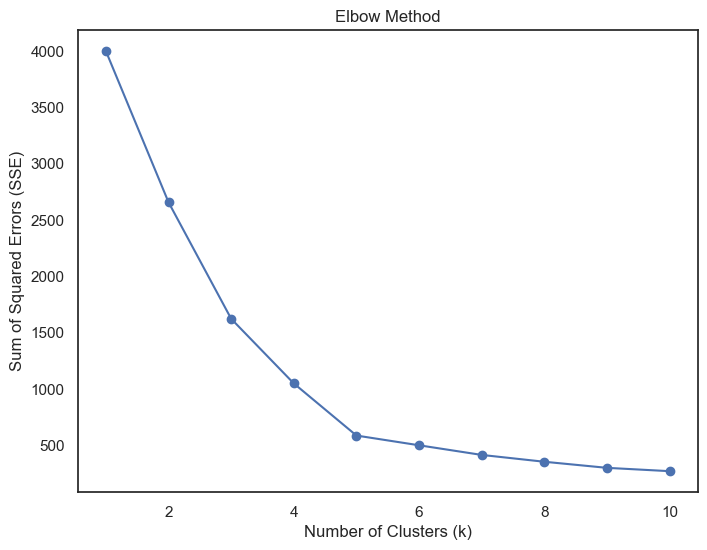

In [527]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3_scaled)
    sse.append(kmeans.inertia_)  # Sum of Squared Errors (SSE)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))    
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

# Save the plot 
plt.savefig('Elbow Method.png')

plt.show()


Note: 
- This plot shows the Sum of Squared Errors (SSE) for different numbers of clusters.
- This helps to determine the optimal number of clusters for K-means.
- There is a significant drop in SSE at k = 4, after which the SSE decreases more slowly. This suggests that k = 4 is a good candidate for the optimal number of clusters, although the SSE still decreases with more clusters, indicating there may be further refinement possible with higher k values like 5 or 6.


**Silhouette Method to determine optimal number of clusters(k)**

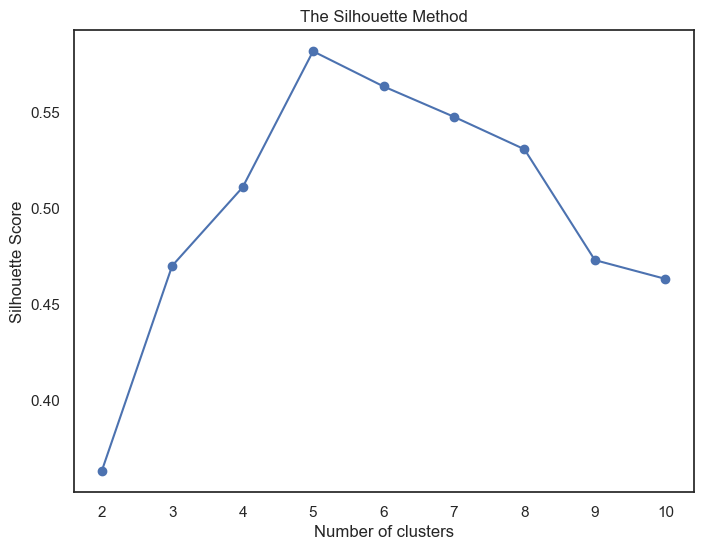

In [531]:
# Silhouette method to determine optimal number of clusters
sil = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans_s = KMeans(n_clusters=k, random_state=42).fit(df3_scaled)  
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df3_scaled, labels, metric='euclidean'))

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax + 1), sil, marker='o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

# Save the plot 
plt.savefig('The Silhouette Method.png')

plt.show()


- The silhouette method measures the quality of the clusters by calculating how similar a point is to its assigned cluster compared to other clusters.

- The highest silhouette score is at k = 5, which suggests that using 5 clusters provides the best-defined separation between the clusters.
k = 4 and k = 6 also have reasonably high scores, indicating they are viable options, but k = 5 appears to offer the best balance between distinct clustering and simplicity.

## 4. Evaluate k-means model at different values of *k*

**With Five Clusters - K=4**

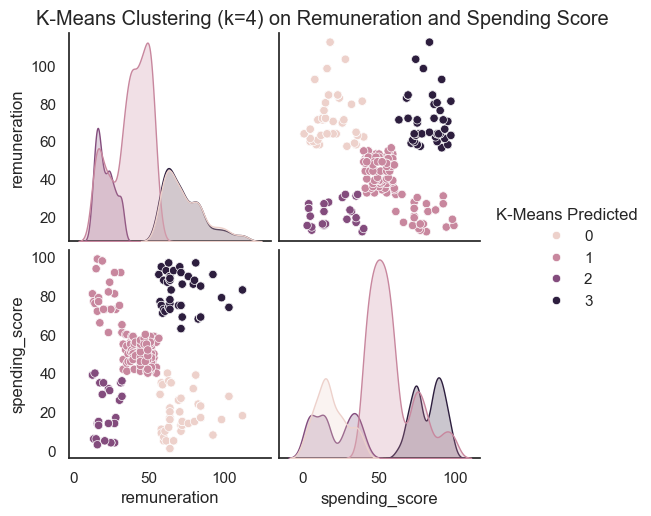

In [536]:
# Use 4 clusters.

# Fit the K-Means model using the normalised data
kmeans = KMeans(n_clusters=4, 
                max_iter=15000, 
                init='k-means++', 
                random_state=42)
kmeans.fit(df3_scaled)

# Get the cluster labels
clusters = kmeans.labels_

# Add the predicted cluster labels back to the original df3
df3['K-Means Predicted'] = clusters

# Plot the clusters using pairplot (on original data, not scaled)
sns.pairplot(df3, hue='K-Means Predicted', diag_kind='kde', vars=['remuneration', 'spending_score'])

# Add a title for clarity
plt.suptitle('K-Means Clustering (k=4) on Remuneration and Spending Score', y=1.02)

# Save the plot 
plt.savefig('K-Means Clustering (k=4) on Remuneration and Spending Score')

plt.show()


In [537]:
# Check the number of observations per predicted class.k=4
df3['K-Means Predicted'].value_counts()

K-Means Predicted
1    1013
3     356
0     351
2     280
Name: count, dtype: int64

In [538]:
# View the DataFrame with the cluster assignments, k=4 (1st 5 and last 5 rows)
pd.concat([df3.head(),df3.tail()])

remuneration  spending_score  K-Means Predicted
0            12.30              39                  2
1            12.30              81                  1
2            13.12               6                  2
3            13.12              77                  1
4            13.94              40                  2
1995         84.46              69                  3
1996         92.66               8                  0
1997         92.66              91                  3
1998         98.40              16                  0
1999         92.66               8                  0

In [542]:
# View the DataFrame with the cluster assignments. (1st 5 and last 5 rows)
pd.concat([x.head(),x.tail()])

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

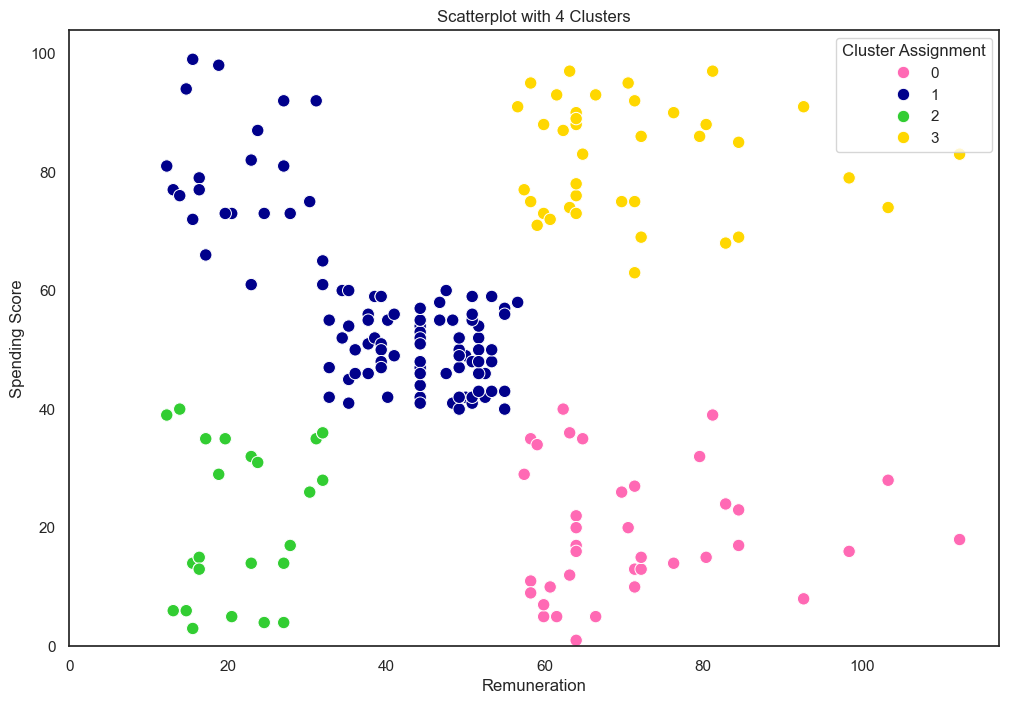

In [543]:
# Visualizing the clusters. k=4

# Set plot style to remove the grid and have a plain white background.
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})
sns.set_style("white") 

# Create a new color palette with six distinct colors for k=4.
palette = ['#FF69B4',  # Pink
           '#00008B',  # Dark Blue
           '#32CD32',  # Green
           '#FFD700',]  # Yellow
           
# Create a scatterplot with the custom palette.
sns.scatterplot(x="remuneration", 
                y="spending_score", 
                data=df3, 
                hue="K-Means Predicted", 
                palette=palette,  
                s=80)  
               
# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot with 4 Clusters")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

# Add a legend with a custom title.
plt.legend(title="Cluster Assignment")  

# Save the plot before showing it
# plt.savefig('Scatterplot with 4 Clusters')

# Show the plot.
plt.show()


Note: 

- The K-means clustering with 4 clusters shows a clear segmentation of the data. 
- Each color represents a different cluster, with visible separation between groups.
-  At k = 4, the clusters are reasonably well-separated, but some clusters, especially in the mid-range remuneration and spending score region, might benefit from further refinement.
-  The model is likely segmenting based on high remuneration/low spending and low remuneration/high spending extremes.

**With Six Clusters - k=6**

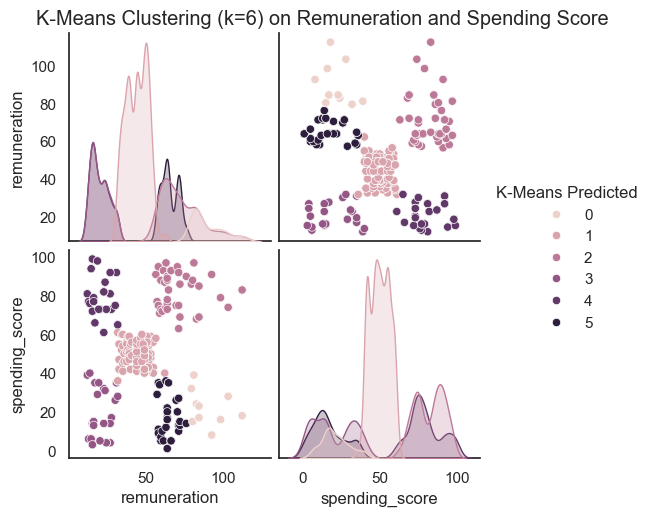

In [548]:
# Use six clusters.

# Fit the K-Means model using the normalised data
kmeans = KMeans(n_clusters=6, 
                max_iter=15000, 
                init='k-means++', 
                random_state=42)
kmeans.fit(df3_scaled)

# Get the cluster labels
clusters = kmeans.labels_

# Add the predicted cluster labels back to the original df3
df3['K-Means Predicted'] = clusters

# Plot the clusters using pairplot (on original data, not scaled)
sns.pairplot(df3, hue='K-Means Predicted', diag_kind='kde', vars=['remuneration', 'spending_score'])

# Save the plot 
# plt.savefig('K-Means Clustering (k=6) on Remuneration and Spending Score')

# Add a title for clarity
plt.suptitle('K-Means Clustering (k=6) on Remuneration and Spending Score', y=1.02)
plt.show()

In [549]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
1    760
2    356
3    271
4    269
5    221
0    123
Name: count, dtype: int64

In [550]:
# View the DataFrame with the cluster assignments. (1st 5 and last 5 rows)
pd.concat([df3.head(),df3.tail()])

remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  4
2            13.12               6                  3
3            13.12              77                  4
4            13.94              40                  3
1995         84.46              69                  2
1996         92.66               8                  0
1997         92.66              91                  2
1998         98.40              16                  0
1999         92.66               8                  0

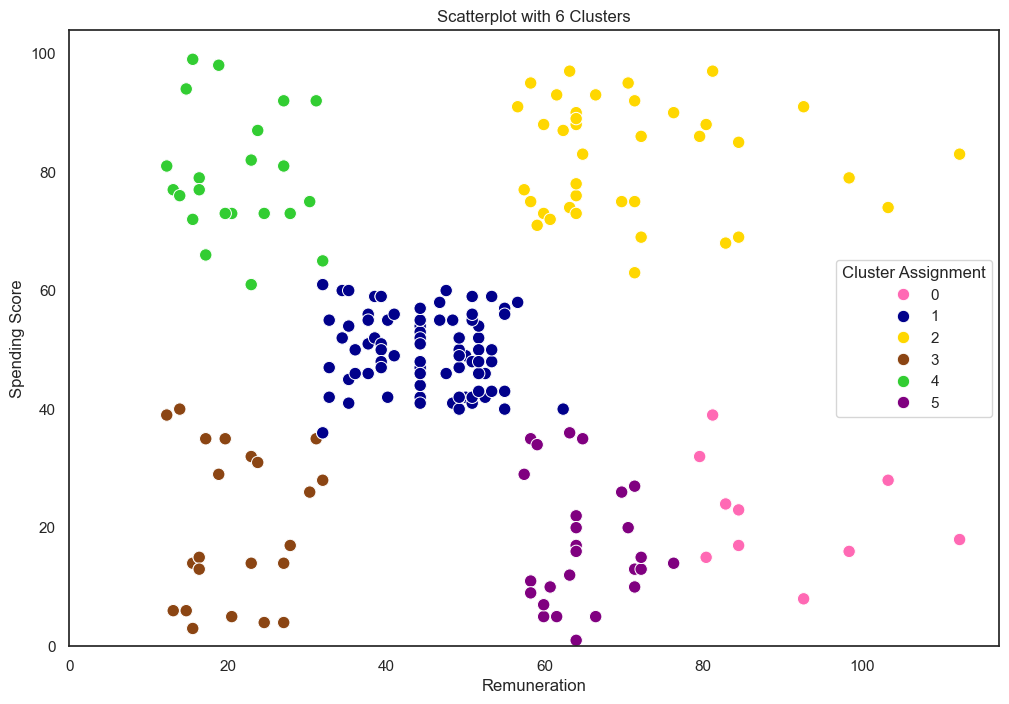

In [551]:
# Visualizing the clusters. k=6

# Set plot style to remove the grid and have a plain white background.
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})
sns.set_style("white")  

# Create a new color palette with six distinct colors for k=6.
palette = ['#FF69B4',  # Pink
           '#00008B',  # Dark Blue
           '#FFD700',  # Yellow
           '#8B4513',  # Brown
           '#32CD32',  # Green
           '#800080']  # Purple


# Create a scatterplot with the custom palette.
sns.scatterplot(x="remuneration", 
                y="spending_score", 
                data=df3, 
                hue="K-Means Predicted", 
                palette=palette, 
                s=80)  
               
# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot with 6 Clusters")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

# Add a legend with a custom title.
plt.legend(title="Cluster Assignment")  

# Save the plot 
# plt.savefig('Scatterplot with 6 Clusters')

# Show the plot.
plt.show()


Note:

- The scatterplot with 6 clusters shows slightly more segmentation, but the separation between certain clusters starts to blur, especially in the middle remuneration range.

- k = 6 provides additional granularity, but the extra cluster might not add significant business value, as some groups overlap slightly, especially for middle-income customers.
  
- While it adds more detail, k = 5 seems to offer a better balance between segment clarity and meaningful business insights.

## 5. Fit final model and justify your choice

**With Five Clusters - K=5**

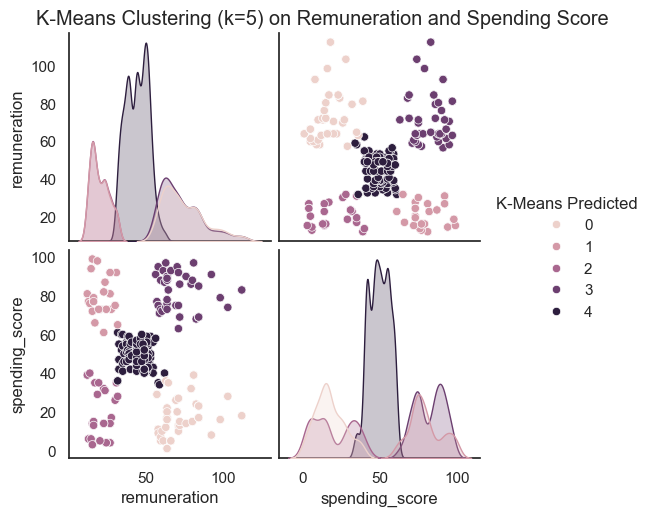

In [559]:
# Apply the final model.
# Use five clusters.

# Fit the K-Means model using the normalised data
kmeans = KMeans(n_clusters=5, 
                max_iter=15000, 
                init='k-means++', 
                random_state=42)
kmeans.fit(df3_scaled)

# Get the cluster labels
clusters = kmeans.labels_

# Add the predicted cluster labels back to the original df3
df3['K-Means Predicted'] = clusters

# Plot the clusters using pairplot (on original data, not scaled)
sns.pairplot(df3, hue='K-Means Predicted', diag_kind='kde', vars=['remuneration', 'spending_score'])

# Add a title for clarity
plt.suptitle('K-Means Clustering (k=5) on Remuneration and Spending Score', y=1.02)

# Save the plot 
# plt.savefig('K-Means Clustering (k=5) on Remuneration and Spending Score')
plt.show()


In [560]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

K-Means Predicted
4    774
3    356
0    330
2    271
1    269
Name: count, dtype: int64

In [561]:
# View the DataFrame with the cluster assignments. (1st 5 and last 5 rows)
pd.concat([x.head(),x.tail()])

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

## 6. Plot and interpret the clusters

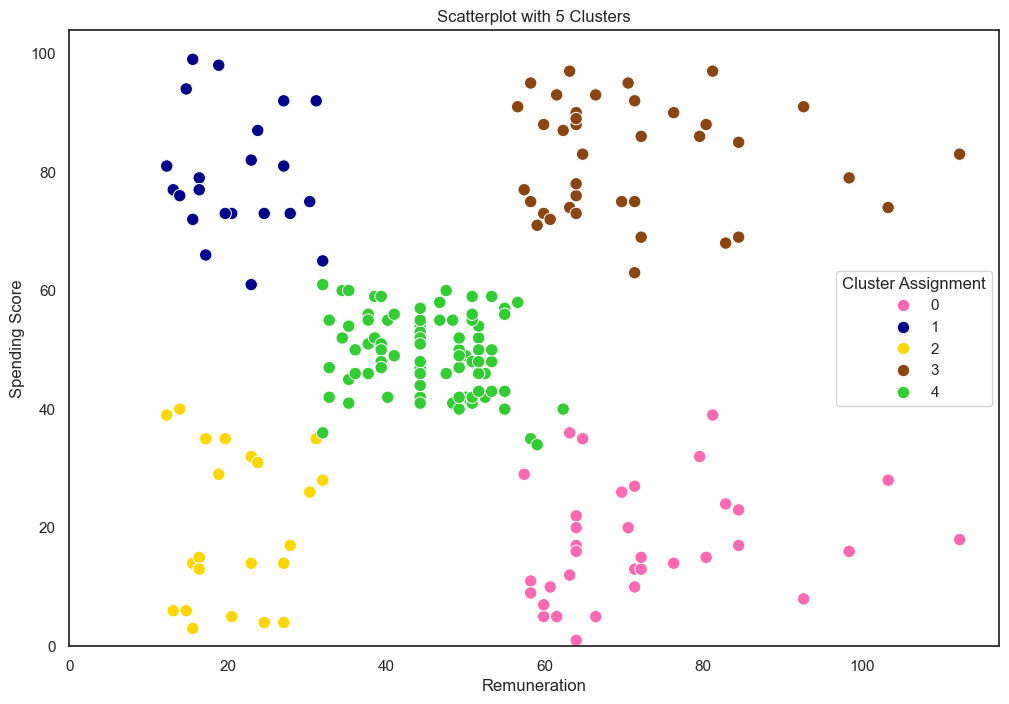

In [563]:
# Visualizing the clusters. k=5

# Set plot style to remove the grid and have a plain white background.
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})
sns.set_style("white")  

# Create a new color palette (custom colors for each cluster).
palette = ['#FF69B4',  # Pink
           '#00008B',  # Dark Blue
           '#FFD700',  # Yellow
           '#8B4513',  # Brown
           '#32CD32',  # Green
           '#800080']  # Purple 

# Create a scatterplot with the custom palette.
sns.scatterplot(x="remuneration", 
                y="spending_score", 
                data=df3, 
                hue="K-Means Predicted", 
                palette=palette, 
                s=80) 
               
# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot with 5 Clusters")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

# Add a legend with a custom title.
plt.legend(title="Cluster Assignment")  

# Save the plot 
# plt.savefig('Scatterplot with 5 Clusters')

# Show the plot.
plt.show()


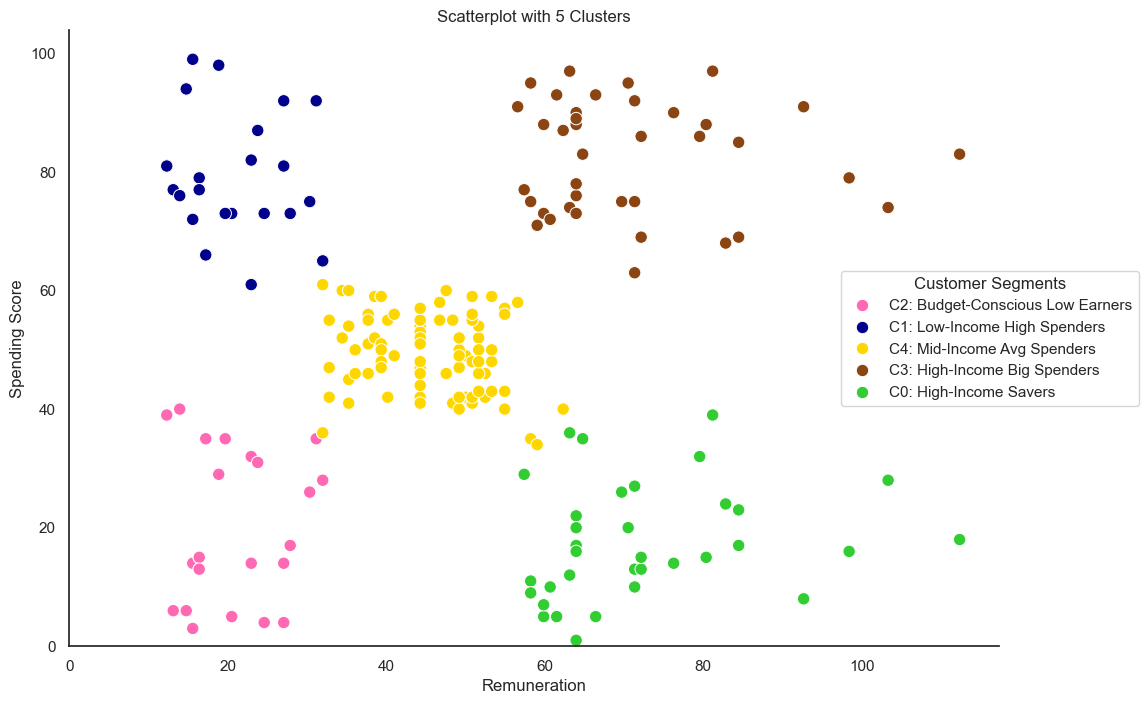

In [564]:
# Mapping for  cluster labels
cluster_labels = {
    0: 'C0: High-Income Savers',
    1: 'C1: Low-Income High Spenders',
    2: 'C2: Budget-Conscious Low Earners',
    3: 'C3: High-Income Big Spenders',
    4: 'C4: Mid-Income Avg Spenders'
}

# Create a new column  with both the cluster number and group names
df3['Cluster Full Label'] = df3['K-Means Predicted'].map(cluster_labels)

# Set plot style 
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})
sns.set_style("white") 

# Create a custom color palette
palette = ['#FF69B4',  # Pink
           '#00008B',  # Dark Blue
           '#FFD700',  # Yellow
           '#8B4513',  # Brown
           '#32CD32',  # Green
           '#800080']  # Purple 

# Create a scatterplot using the custom palette and labels
sns.scatterplot(x="remuneration", 
                y="spending_score", 
                data=df3, 
                hue="Cluster Full Label",  
                palette=palette,  
                s=80)  

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot with 5 Clusters")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

# Move the legend outside the plot, closer to the middle-right
plt.legend(title="Customer Segments", bbox_to_anchor=(1.15, 0.5), loc='center right', borderaxespad=0.)

# Remove only the top and right plot margins 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot 
# plt.savefig('Scatterplot_with_Legend')

# Show the plot.
plt.show()


Note: 
- Based on the Elbow and Silhouette methods, the k = 5 clustering seems to provide the most distinct and well-defined groups. 
- There’s a good separation between the different clusters, especially in the higher remuneration ranges.

In [571]:
# Calculate the mean values of the numeric variables for each cluster
cluster_analysis = df3.groupby('K-Means Predicted')[numeric_columns].mean()

# Rename the columns for clarity
cluster_analysis.rename(columns={'remuneration': 'Avg remuneration (K£)', 
                                 'spending_score': 'Avg spending score'}, inplace=True)

# Calculate the count of customers in each cluster
cluster_counts = df3['K-Means Predicted'].value_counts().sort_index()

# Add the count of customers to the cluster analysis DataFrame
cluster_analysis['Customer Count'] = cluster_counts

# Calculate the spending score range (min and max for each cluster)
spending_score_min = df3.groupby('K-Means Predicted')['spending_score'].min()
spending_score_max = df3.groupby('K-Means Predicted')['spending_score'].max()

# Create a column with spending score ranges 
cluster_analysis['Spending Score Range'] = spending_score_min.astype(str) + " - " + spending_score_max.astype(str)

# Display the cluster analysis 
cluster_analysis

Avg remuneration (K£)  Avg spending score  Customer Count  \
K-Means Predicted                                                              
0                              74.831212           17.424242             330   
1                              20.353680           79.416357             269   
2                              20.424354           19.763838             271   
3                              73.240281           82.008427             356   
4                              44.418786           49.529716             774   

                  Spending Score Range  
K-Means Predicted                       
0                               1 - 39  
1                              61 - 99  
2                               3 - 40  
3                              63 - 97  
4                              34 - 61

Note:

- Average income (remuneration) and spending score were calculated for each cluster to segment the customer database
- This is to be used for clustering interpretation and business recommendations

## Final Insights and observations

The segmentation using K-means clustering resulted in 5 distinct customer groups based on Average income and spending score

1. Cluster 0: High-Income Savers

Avg Remuneration: £74.83k
Avg Spending Score: 17.42
-  Target with premium collector’s editions of video games, luxury board game sets, and exclusive toys.
-  Consider offering investment-oriented products like high-end, limited-edition items.

2. Cluster 1: Low-Income High Spenders

Avg Remuneration: £20.35k
Avg Spending Score: 79.42
- Focus on value-driven promotions, bundle deals, and discounts on popular video games, board games, and toys.
- Offer financing options or installment plans for higher-priced items to increase affordability.


3. Cluster 2: Budget-Conscious Low Earners

Avg Remuneration: £20.42k
Avg Spending Score: 19.76
- Provide affordable options, such as budget-friendly board games, toys, and lower-cost video games.
- Highlight essential, cost-effective products and offer occasional discounts to keep engagement high.


4. Cluster 3: High-Income Big Spenders

Avg Remuneration: £73.24k
Avg Spending Score: 82.00
- Offer premium, personalized gaming experiences, such as VIP access to exclusive video games or custom-built board game sets.
- Provide early access to new releases and bespoke high-end gaming products and toys.

5. Cluster 4: Middle-Income Average Spenders

Avg Remuneration: £44.42k
Avg Spending Score: 49.53
- Target with mid-tier products that balance quality and price, such as best-selling board games and video games.
- Consider loyalty programs, subscription services, or bundled product offers to engage this group.

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [95]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [96]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/Tilly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Tilly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# Load the data set as df4.
df4 = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   remuneration     2000 non-null   float64
 3   spending_score   2000 non-null   int64  
 4   loyalty_points   2000 non-null   int64  
 5   education        2000 non-null   object 
 6   product_code     2000 non-null   int64  
 7   customer_review  2000 non-null   object 
 8   review_summary   2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [98]:
# Explore data set.
# View the DataFrame : 1st 5 and last 5 rows
pd.concat([df4.head(),df4.tail()])

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product_code                                    customer_review  \
0              453  When it comes to a DM's screen, the space on t...   
1              466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              254  Nice art, nice printing.  Why two panels are f...   
3              263  Amazing buy! Bought it as a gift for our new d...   
4              291  As my review of GF9's previous screens these w...   
1995           977  The perfect word game for mixed ages (with Mom...   
1996           979  Great game.  Did not think I would like it whe...   
1997          1012  Great game for all.........\nKeeps the mind ni...   
1998          1031                                          fun game!   
1999           453  This game is fun. A lot like scrabble without ...   

                                         review_summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game

In [99]:
# Descriptive statistics.
df4.describe()

age  remuneration  spending_score  loyalty_points  product_code
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [100]:
# Keep necessary columns. Drop unnecessary columns.
df4_new = df4.drop(columns=["gender", "age", "remuneration", "spending_score",
                                  "loyalty_points", "education", "product_code"])

# View DataFrame.
df4_new.head()

customer_review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                      review_summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [101]:
# Determine if there are any missing values.
missing_values = df4_new.isnull().sum()
print(missing_values)

customer_review    0
review_summary     0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [103]:
# customer_review: Change all to lower case and join with a space.
df4_new["customer_review"] = df4_new["customer_review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4_new["customer_review"].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: customer_review, dtype: object

In [104]:
# review_summary: Change all to lower case and join with a space.
df4_new["review_summary"] = df4_new["review_summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4_new["review_summary"].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: review_summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

**Check for punctuation**

In [116]:
import string

# Combine all customer reviews into one string
all_text = " ".join(df4_new["customer_review"])

# Find all unique punctuations in the text
punctuations_in_text = set([char for char in all_text if char in string.punctuation])

# Print the result
print("Punctuations found in reviews: ", punctuations_in_text)


Punctuations found in reviews:  {'_', '%', '-', ')', '[', ':', '+', '?', '*', '<', '`', '>', '!', '(', '~', ']', ',', '$', ';', '"', '.', '/', '&', "'", '#', '='}


In [118]:
# Combine all customer reviews into one string
all_text = " ".join(df4_new["review_summary"])

# Find all unique punctuations in the text
punctuations_in_text = set([char for char in all_text if char in string.punctuation])

# Print the result
print("Punctuations found in review_summary: ", punctuations_in_text)


Punctuations found in review_summary:  {',', '+', '?', '%', ';', '-', '#', '~', '"', ')', '.', ':', '!', '/', '&', "'", '('}


**Remove punctuation**

In [121]:
# Replace all the punctuations in customer_review column using string.punctuation
df4_new["customer_review"] = df4_new["customer_review"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Preview the result.
df4_new["customer_review"]

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: customer_review, Length: 2000, dtype: object

In [123]:
# Replace all the punctuations in review_summary column using string.punctuation
df4_new["review_summary"] = df4_new["review_summary"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Preview the result.
df4_new["review_summary"]

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: review_summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [126]:
# Check fro duplicates in customer reviews.
df4_new.customer_review.duplicated().sum()

50

In [128]:
# Check fro duplicates in review_summary.
df4_new.review_summary.duplicated().sum()

649

In [130]:
# Drop duplicates in both columns.
df4_nodupe= df4_new.drop_duplicates(subset=["customer_review","review_summary"])

# View DataFrame.
df4_nodupe

customer_review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                         review_summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

## 3. Tokenise and create wordclouds

**Tokenisation**

In [134]:
# Create new DataFrame (copy DataFrame).
df4_nodupe_copy= df4_nodupe

# View DataFrame.
df4_nodupe_copy

customer_review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                         review_summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [136]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/Tilly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
# Apply tokenisation to customer_review
df4_nodupe_copy['tokens_review'] = df4_nodupe_copy['customer_review'].apply(word_tokenize)

# Preview data
df4_nodupe_copy['tokens_review'].head()


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [140]:
# Apply tokenisation to review_summary
df4_nodupe_copy['tokens_summary'] = df4_nodupe_copy['review_summary'].apply(word_tokenize)

# Preview data
df4_nodupe_copy['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

In [142]:
# Convert token lists back into strings for customer reviews and review summaries
df4_nodupe_copy['review_text'] = df4_nodupe_copy['tokens_review'].apply(lambda x: ' '.join(x))
df4_nodupe_copy['summary_text'] = df4_nodupe_copy['tokens_summary'].apply(lambda x: ' '.join(x))

# Preview the combined text for customer reviews and summaries
df4_nodupe_copy[['review_text', 'summary_text']].head()


review_text  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_text  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

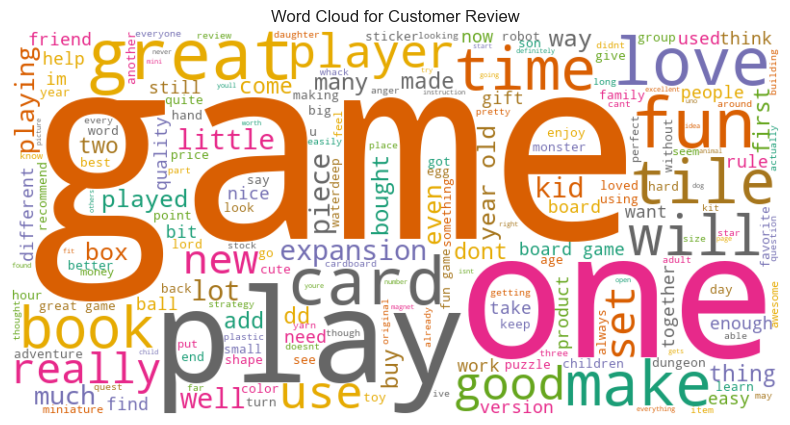

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for customer reviews
review_wordcloud = WordCloud(width=800, height=400, 
                             background_color='white', 
                             colormap='Dark2').generate(' '.join(df4_nodupe_copy['review_text']))

# Plot the word cloud for customer reviews
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Review')


plt.savefig('Word Cloud for Customer Review')

plt.show()


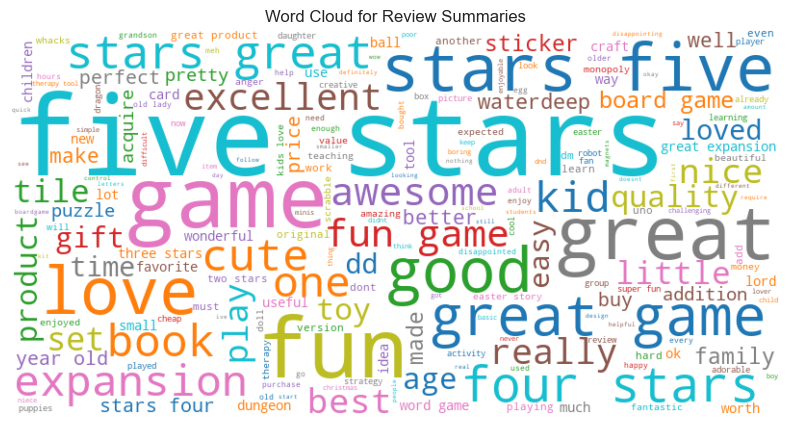

In [148]:
# Create a word cloud for review summaries
summary_wordcloud = WordCloud(width=800, height=400, 
                              background_color='white',
                              colormap='tab10').generate(' '.join(df4_nodupe_copy['summary_text']))

# Plot the word cloud for review summaries
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Summaries')

plt.savefig('Word Cloud for Review Summaries')

plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [151]:
# Determine the frequency distribution for customer_review
review_fdist = FreqDist([word for tokens in df4_nodupe_copy['tokens_review'] for word in tokens])

# Display the 15 most common words in customer reviews
print("Most common words in customer reviews:")
print(review_fdist.most_common(15))

Most common words in customer reviews:
[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]


In [153]:
# Determine the frequency distribution for review_summary
summary_fdist = FreqDist([word for tokens in df4_nodupe_copy['tokens_summary'] for word in tokens])

# Display the 15 most common words in review summaries
print("\nMost common words in review summaries:")
print(summary_fdist.most_common(15))


Most common words in review summaries:
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]


### 4b) Remove alphanumeric characters and stopwords

In [156]:
import nltk
from nltk.corpus import stopwords

# Download the stopword list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Tilly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
# Define stopwords from nltk
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and alphanumerics from tokens
def clean_tokens(tokens):
    tokens_cleaned = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens_cleaned

# Apply cleaning to tokenized columns for customer reviews
df4_nodupe_copy['tokens_review_cleaned'] = df4_nodupe_copy['tokens_review'].apply(clean_tokens)

# View cleaned tokens
df4_nodupe_copy['tokens_review_cleaned'] 

0       [comes, dms, screen, space, screen, absolute, ...
1       [open, letter, unpainted, miniatures, bad, spe...
2       [nice, art, nice, printing, two, panels, fille...
3          [amazing, buy, bought, gift, new, dm, perfect]
4       [review, previous, screens, completely, unnece...
                              ...                        
1995    [perfect, word, game, mixed, ages, mom, perhap...
1996    [great, game, think, would, like, first, recei...
1997                   [great, game, keeps, mind, nimble]
1998                                          [fun, game]
1999    [game, fun, lot, like, scrabble, without, litt...
Name: tokens_review_cleaned, Length: 1961, dtype: object

In [160]:
# Apply cleaning to tokenized columns for review summaries
df4_nodupe_copy['tokens_summary_cleaned'] = df4_nodupe_copy['tokens_summary'].apply(clean_tokens)

# View cleaned tokens
df4_nodupe_copy['tokens_summary_cleaned'] 

0       [fact, space, wasted, art, terribly, informati...
1          [another, worthless, dungeon, masters, screen]
2                         [pretty, also, pretty, useless]
3                                           [five, stars]
4                                           [money, trap]
                              ...                        
1995              [perfect, word, game, mixed, ages, mom]
1996                                         [super, fun]
1997                                        [great, game]
1998                                        [four, stars]
1999                                         [love, game]
Name: tokens_summary_cleaned, Length: 1961, dtype: object

### Additional - Recreate Frequency Distribution (Cleaned Data)

In [163]:
# Create frequency distribution for cleaned customer reviews
review_fdist_cleaned = FreqDist([word for tokens in df4_nodupe_copy['tokens_review_cleaned'] for word in tokens])

# Display the 15 most common words in cleaned customer reviews
print("Most common words in cleaned customer reviews:")
print(review_fdist_cleaned.most_common(15))

Most common words in cleaned customer reviews:
[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


In [165]:
# Create frequency distribution for cleaned review summaries
summary_fdist_cleaned = FreqDist([word for tokens in df4_nodupe_copy['tokens_summary_cleaned'] for word in tokens])

# Display the 15 most common words in cleaned review summaries
print("\nMost common words in cleaned review summaries:")
print(summary_fdist_cleaned.most_common(15))


Most common words in cleaned review summaries:
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]


### 4c) Create wordcloud without stopwords

**wordcloud without stop words for customer reviews**

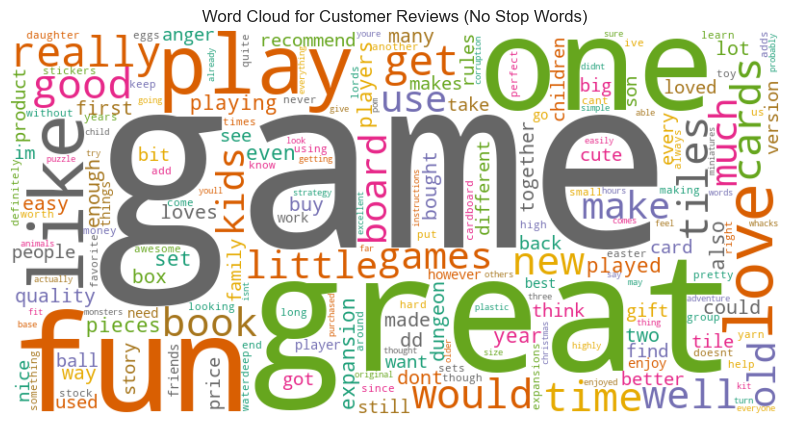

In [171]:
# Word cloud for customer reviews (after removing stopwords and alphanumerics)
review_wordcloud_cleaned = WordCloud(width=800, 
                                     height=400, 
                                     background_color='white',
                                     colormap='Dark2').generate_from_frequencies(review_fdist_cleaned)

# Plot the word cloud for customer reviews (without stopwords)
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews (No Stop Words)')

plt.savefig('Word Cloud for Customer Reviews (No Stop Words)')

plt.show()

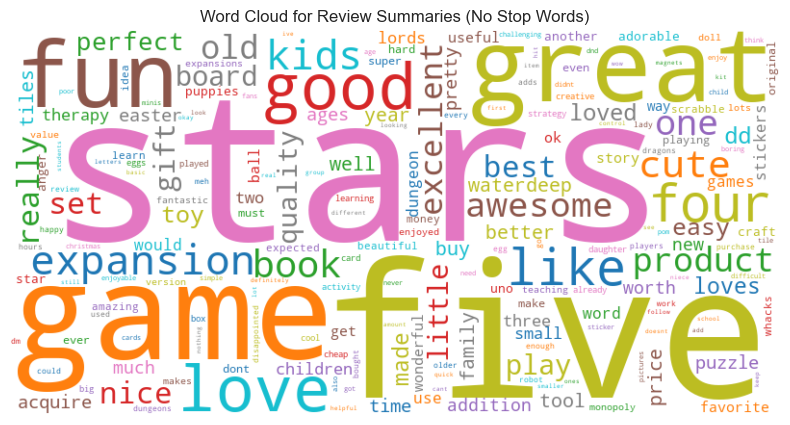

In [175]:
# Word cloud for review summaries (after removing stopwords and alphanumerics)
summary_wordcloud_cleaned = WordCloud(width=800, 
                                      height=400, 
                                      background_color='white',
                                      colormap='tab10').generate_from_frequencies(summary_fdist_cleaned)

# Plot the word cloud for review summaries (without stopwords)
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Summaries (No Stop Words)')

plt.savefig('Word Cloud for Review Summaries  (No Stop Words)')

plt.show()

Note:
As a game manufacturer and retailer, the word 'game' dominates the word cloud, adding little value for insights. I removed 'game' in later analysis steps to reduce redundancy and focus on more meaningful feedback

**Wordcloud without stop words and "Game" for customer reviews**

In [249]:
# Define a custom stopword list and add 'game' to it
custom_stopwords = set(stopwords.words('english'))  # Load default stopwords
custom_stopwords.update(['game', 'Game'])  # Add 'game' to the stopwords list

# Create a new frequency distribution excluding 'game'
# Tokens from 'tokens_review_cleaned' excluding custom stopwords
review_tokens_no_game = [word for tokens in df4_nodupe_copy['tokens_review_cleaned'] for word in tokens if word not in custom_stopwords]

# Create frequency distribution for the modified tokens (without 'game')
review_fdist_no_game = FreqDist(review_tokens_no_game)

# Display the 15 most common words in cleaned customer reviews
print('Most common words in cleaned customer reviews (Without "Game"):')
print(review_fdist_no_game .most_common(15))



Most common words in cleaned customer reviews (Without "Game"):
[('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273), ('well', 269)]


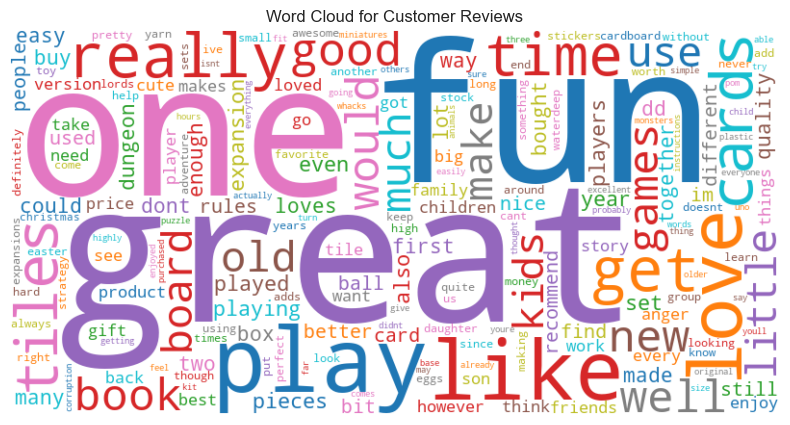

In [473]:
#Generate the word cloud for reviews without 'game'
review_wordcloud_no_game = WordCloud(width=800, 
                                     height=400, 
                                     background_color='white',
                                     colormap='tab10').generate_from_frequencies(review_fdist_no_game)

# Step 4: Plot the word cloud for customer reviews without 'game'
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud_no_game, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')

plt.savefig('Word Cloud for Customer Reviews')
            
plt.show()

Observations: 

- The words "great," "fun," and "play" dominate the cloud, indicating that customers frequently use these positive terms when discussing their experiences. Interestingly, neutral terms like "one" and "time" also appear, suggesting that customers talk about practical aspects of the products 

**Wordcloud without stop words and "Game" for Review Summary**

In [253]:
# Create a new frequency distribution excluding 'game'
# Tokens from 'tokens_summary_cleaned' excluding custom stopwords
summary_tokens_no_game = [word for tokens in df4_nodupe_copy['tokens_summary_cleaned'] for word in tokens if word not in custom_stopwords]

# Create frequency distribution for the modified tokens (without 'game')
summary_fdist_no_game = FreqDist(summary_tokens_no_game)

# Display the 15 most common words in cleaned customer reviews
print('Most common words in cleaned customer summary (Without "Game"):')
print(summary_fdist_no_game .most_common(15))


Most common words in cleaned customer summary (Without "Game"):
[('stars', 427), ('five', 342), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36), ('product', 35)]


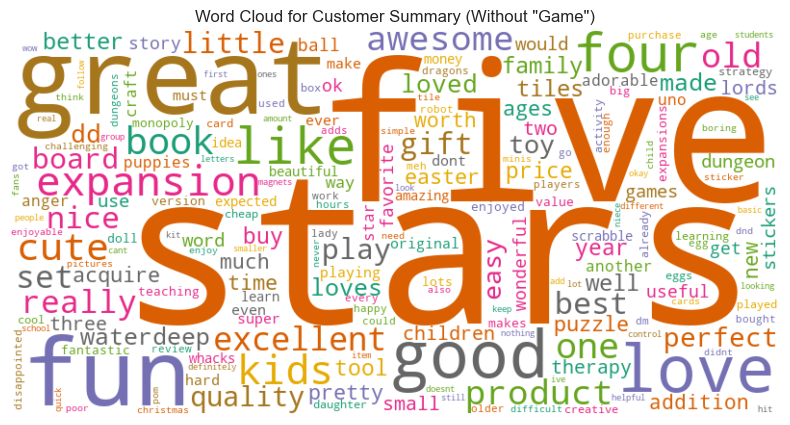

In [255]:
# Generate the word cloud for summary without 'game'
summary_wordcloud_no_game = WordCloud(width=800, 
                                     height=400, 
                                     background_color='white',
                                     colormap='Dark2').generate_from_frequencies(summary_fdist_no_game)

# Plot the word cloud for customer summary without 'game'
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud_no_game, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Summary (Without "Game")')
plt.show()


### 4d) Identify 15 most common words and polarity

In [178]:
# Determine the 15 most common words in customer reviews.

# Get the 15 most common words from the cleaned customer reviews
most_common_review_words = review_fdist_cleaned.most_common(15)

# Create a DataFrame to store the words and their frequencies
review_common_df = pd.DataFrame(most_common_review_words, columns=['Word', 'Frequency'])

# Calculate sentiment polarity for each word
def get_polarity(word):
    return TextBlob(word).sentiment.polarity

# Apply the get_polarity function to calculate polarity for customer reviews
review_common_df['Polarity'] = review_common_df['Word'].apply(get_polarity)

# Display the top 15 common words with their frequency and sentiment polarity for customer reviews
print("Customer Reviews - Most Common Words with Polarity:")
review_common_df


Customer Reviews - Most Common Words with Polarity:


Word  Frequency  Polarity
0     game       1671      -0.4
1    great        580       0.8
2      fun        552       0.3
3      one        530       0.0
4     play        502       0.0
5     like        414       0.0
6     love        323       0.5
7   really        319       0.2
8      get        319       0.0
9    cards        301       0.0
10   tiles        297       0.0
11    time        291       0.0
12    good        289       0.7
13   would        280       0.0
14    book        273       0.0

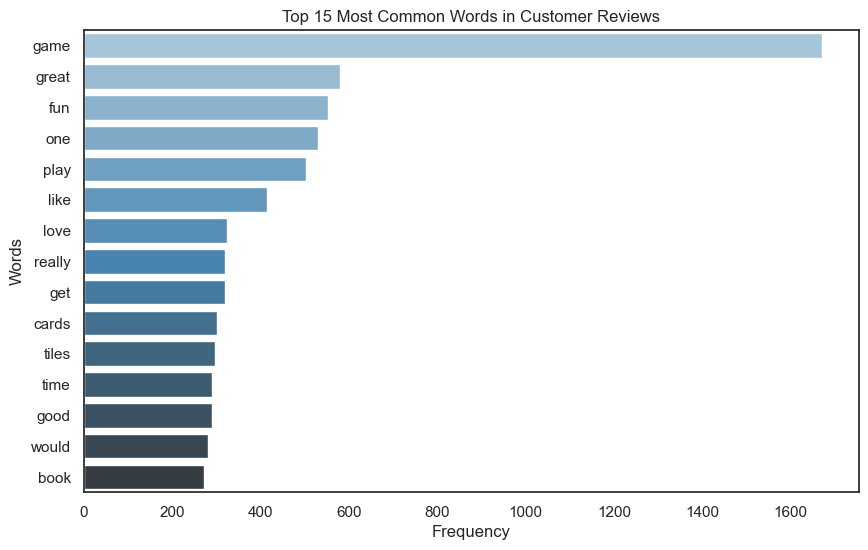

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualise the most common words by frequency for customer reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=review_common_df, palette='Blues_d')
plt.title('Top 15 Most Common Words in Customer Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.savefig('Top 15 Most Common Words in Customer Reviews')

plt.show()


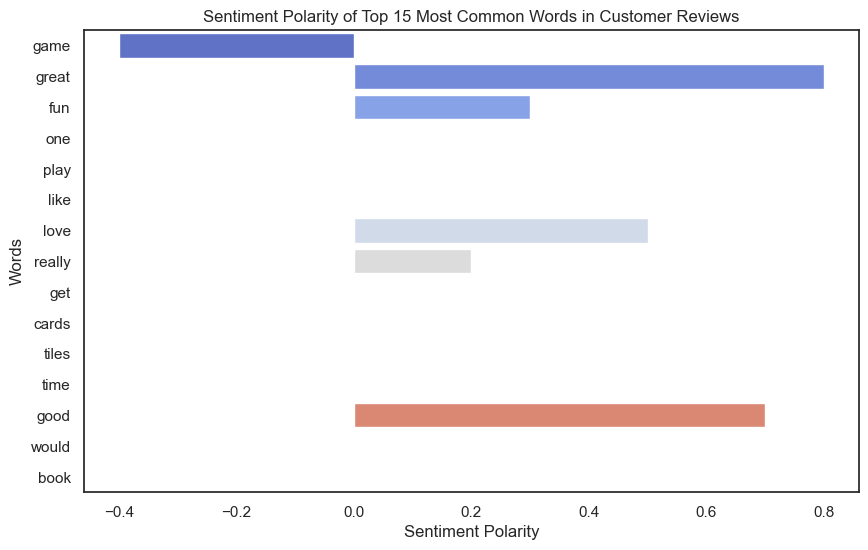

In [265]:
# Visualize sentiment polarity for customer reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='Polarity', y='Word', data=review_common_df, palette='coolwarm')
plt.title('Sentiment Polarity of Top 15 Most Common Words in Customer Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Words')

plt.savefig('Sentiment Polarity of Top 15 Most Common Words in Customer Reviews')

plt.show()

Observation:
- Most of the top words like "great," "fun," and "good" have positive polarity, while the word "game" has a negative polarity of -0.4, likely because it is used in both positive and negative contexts. This can skew analysis hence removed in later analysis stages.

**Identify 15 most common words and polarity in Customer Reviews - Excluding the word "Game"**

In [274]:
# Determine the 15 most common words in customer reviews (Exclude-game)

# Get the 15 most common words from the cleaned customer reviews
popular_review_words_nogame = review_fdist_no_game.most_common(15)

# Create a DataFrame to store the words and their frequencies
review_popular_df = pd.DataFrame(popular_review_words_nogame, columns=['Word', 'Frequency'])

# Calculate sentiment polarity for each word
def get_polarity(word):
    return TextBlob(word).sentiment.polarity

# Apply the get_polarity function to calculate polarity for customer reviews
review_popular_df['Polarity'] = review_popular_df['Word'].apply(get_polarity)

# Display the top 15 common words with their frequency and sentiment polarity for customer reviews
print("Customer Reviews - Most Common Words with Polarity : Excluding'game':")
review_popular_df

Customer Reviews - Most Common Words with Polarity : Excluding'game':


Word  Frequency  Polarity
0    great        580       0.8
1      fun        552       0.3
2      one        530       0.0
3     play        502       0.0
4     like        414       0.0
5     love        323       0.5
6   really        319       0.2
7      get        319       0.0
8    cards        301       0.0
9    tiles        297       0.0
10    time        291       0.0
11    good        289       0.7
12   would        280       0.0
13    book        273       0.0
14    well        269       0.0

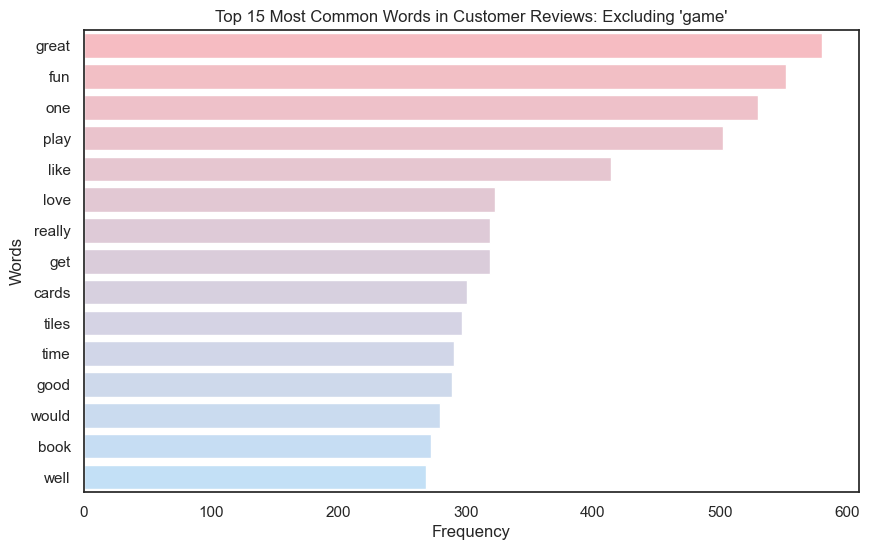

In [439]:
# Define a custom pastel gradient (e.g., light pink to light blue)
pastel_cmap = LinearSegmentedColormap.from_list("pastel_gradient", ["#ffb3ba", "#bae1ff"])

# Generate the pastel gradient colors for the bars
colors = pastel_cmap(np.linspace(0, 1, len(review_popular_df)))

# Visualise the most common words by frequency for customer reviews (Exclude 'game')
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=review_popular_df, palette=colors)
plt.title("Top 15 Most Common Words in Customer Reviews: Excluding 'game'")
plt.xlabel('Frequency')
plt.ylabel('Words')

# Optionally save the plot
plt.savefig("Top 15 Most Common Words in Customer Reviews: Excluding 'game'")

plt.show()


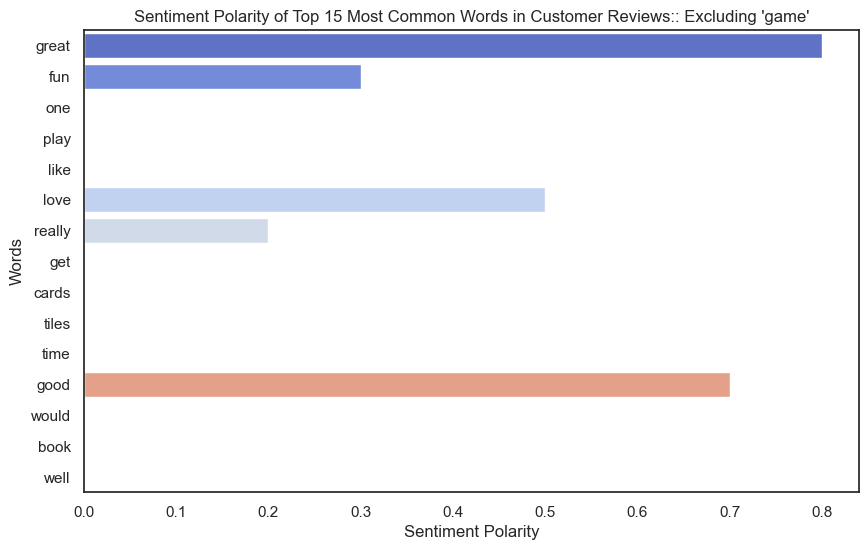

In [306]:
# Visualize sentiment polarity for customer reviews (Exclude 'game')
plt.figure(figsize=(10, 6))
sns.barplot(x='Polarity', y='Word', data=review_popular_df, palette='coolwarm')
plt.title("Sentiment Polarity of Top 15 Most Common Words in Customer Reviews:: Excluding 'game'")
plt.xlabel('Sentiment Polarity')
plt.ylabel('Words')

plt.show()

In [186]:
# Determine the 15 most common words in review summaries.

# Get the 15 most common words from the cleaned review summaries
most_common_summary_words = summary_fdist_cleaned.most_common(15)

# Create a DataFrame to store the words and their frequencies
summary_common_df = pd.DataFrame(most_common_summary_words, columns=['Word', 'Frequency'])

# Calculate sentiment polarity for each word
def get_polarity(word):
    return TextBlob(word).sentiment.polarity

# Apply the get_polarity function to calculate polarity for review summaries
summary_common_df['Polarity'] = summary_common_df['Word'].apply(get_polarity)

# Display the top 15 common words with their frequency and sentiment polarity for review summaries
print("\nReview Summaries - Most Common Words with Polarity:")
summary_common_df


Review Summaries - Most Common Words with Polarity:


Word  Frequency  Polarity
0       stars        427       0.0
1        five        342       0.0
2        game        319      -0.4
3       great        295       0.8
4         fun        218       0.3
5        love         93       0.5
6        good         92       0.7
7        four         58       0.0
8        like         54       0.0
9   expansion         52       0.0
10       kids         50       0.0
11       cute         45       0.5
12       book         43       0.0
13        one         38       0.0
14    awesome         36       1.0

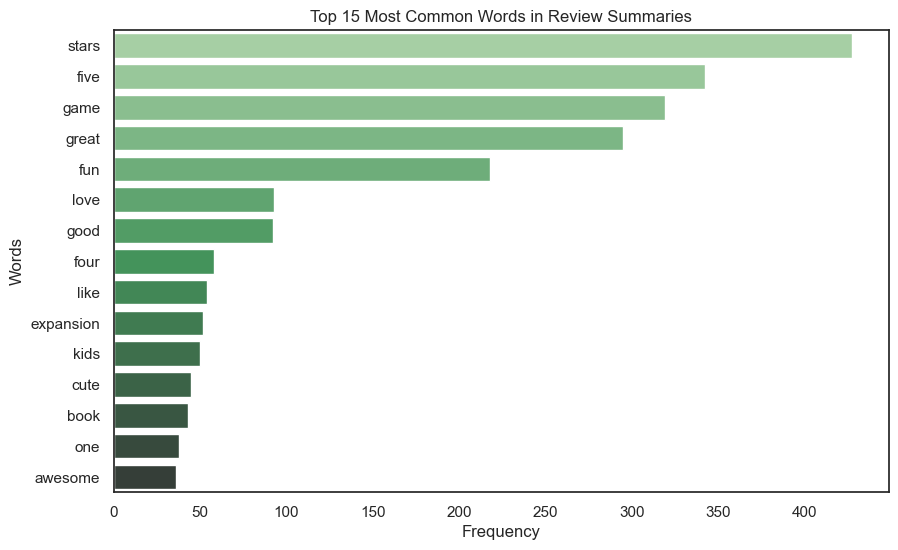

In [188]:
# Visualise the most common words by frequency for review summaries
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', 
            y='Word', 
            data=summary_common_df, 
            palette='Greens_d')
plt.title('Top 15 Most Common Words in Review Summaries')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.savefig('Top 15 Most Common Words in Review Summaries')

plt.show()

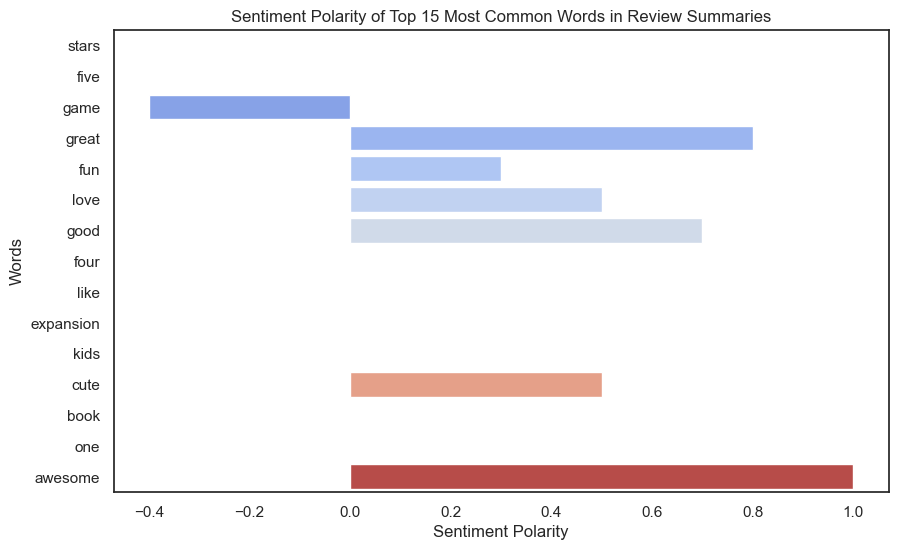

In [190]:
# Visualize sentiment polarity for review summaries
plt.figure(figsize=(10, 6))
sns.barplot(x='Polarity', y='Word', data=summary_common_df, palette='coolwarm')
plt.title('Sentiment Polarity of Top 15 Most Common Words in Review Summaries')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Words')

plt.savefig('Sentiment Polarity of Top 15 Most Common Words in Review Summaries')

plt.show()


## 5. Review polarity and sentiment
## 5a. Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [347]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [349]:
# Determine polarity for the customer_review column

# Apply polarity to the customer_review column
df4_nodupe_copy['review_polarity'] = df4_nodupe_copy['customer_review'].apply(generate_polarity)

# View output.
df4_nodupe_copy['review_polarity']

0      -0.036111
1       0.035952
2       0.116640
3       0.578788
4      -0.316667
          ...   
1995    0.168750
1996    0.158333
1997    0.200000
1998   -0.050000
1999   -0.095833
Name: review_polarity, Length: 1961, dtype: float64

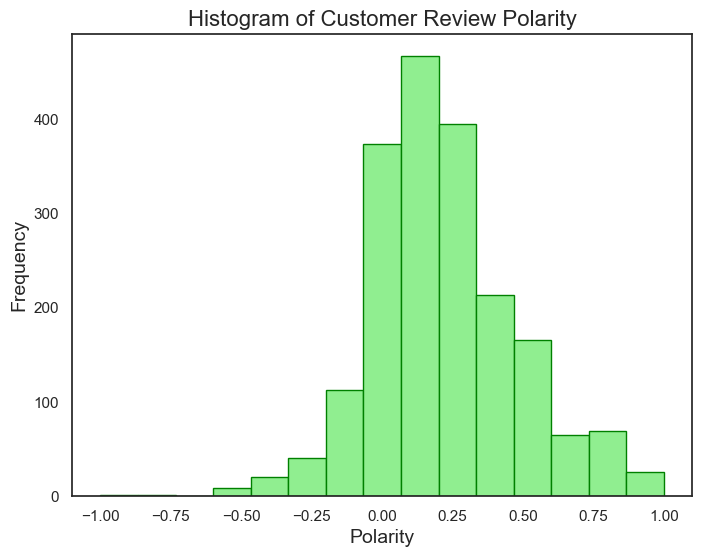

In [350]:
# Create a histogram plot with bins = 15.
sns.set_style("white")

# Plotting the histogram for customer review polarity
plt.figure(figsize=(8, 6))
plt.hist(df4_nodupe_copy['review_polarity'], 
         bins=15, 
         edgecolor='green', 
         color='#90EE90')

# Customising the chart title and labels
plt.title('Histogram of Customer Review Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)

# plt.savefig('Histogram of Customer Review Polarity')

# Show the plot
plt.show()


In [351]:
# Determine polarity for the the review_summary column

# Apply polarity to the review_summary column
df4_nodupe_copy['summary_polarity'] = df4_nodupe_copy['review_summary'].apply(generate_polarity)

# View output.
df4_nodupe_copy['summary_polarity']

0       0.150000
1      -0.800000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.200000
1996    0.316667
1997    0.200000
1998    0.000000
1999    0.050000
Name: summary_polarity, Length: 1961, dtype: float64

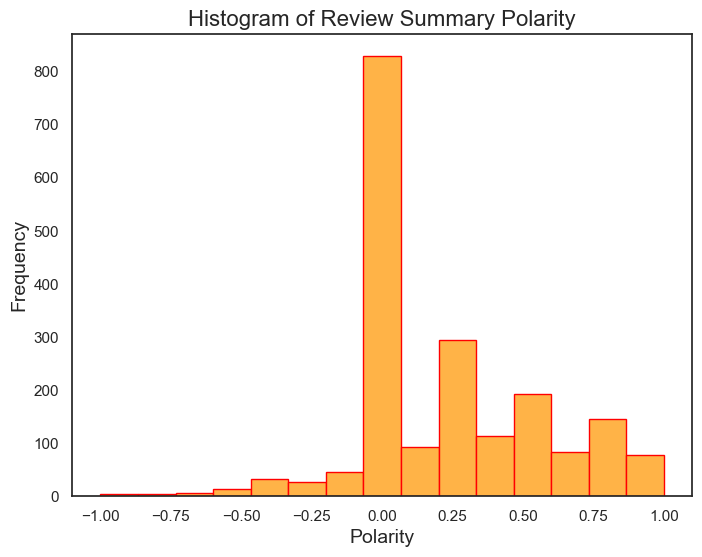

In [353]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Plotting the histogram for review summary polarity
plt.figure(figsize=(8, 6))

# Use a pastel orange color (#FFB347) and remove the grid
plt.hist(df4_nodupe_copy['summary_polarity'], 
         bins=15, 
         edgecolor='red', 
         color='#FFB347')

# Customizing the chart title and labels
plt.title('Histogram of Review Summary Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)

# plt.savefig('Histogram of Review Summary Polarity')

# Show the plot
plt.show()


## 5b. Calculate subjectivity score

In [356]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for customer_review
df4_nodupe_copy['review_subjectivity'] = df4_nodupe_copy['customer_review'].apply(generate_subjectivity)

# Populate a new column with subjectivity scores for review_summary
df4_nodupe_copy['summary_subjectivity'] = df4_nodupe_copy['review_summary'].apply(generate_subjectivity)

# Preview the result
df4_nodupe_copy[['review_subjectivity', 'summary_subjectivity']].head()


review_subjectivity  summary_subjectivity
0             0.486111              0.500000
1             0.442976              0.900000
2             0.430435              0.733333
3             0.784848              0.000000
4             0.316667              0.000000

In [358]:
# Show both polarity and subjectivity in a new DataFrame
df_subjectivity_polarity = df4_nodupe_copy[['customer_review', 'review_polarity', 'review_subjectivity', 
                                            'review_summary', 'summary_polarity', 'summary_subjectivity']]

# Display the first few rows of the new DataFrame
df_subjectivity_polarity

customer_review  review_polarity  \
0     when it comes to a dms screen the space on the...        -0.036111   
1     an open letter to galeforce9 your unpainted mi...         0.035952   
2     nice art nice printing why two panels are fill...         0.116640   
3     amazing buy bought it as a gift for our new dm...         0.578788   
4     as my review of gf9s previous screens these we...        -0.316667   
...                                                 ...              ...   
1995  the perfect word game for mixed ages with mom ...         0.168750   
1996  great game did not think i would like it when ...         0.158333   
1997           great game for all keeps the mind nimble         0.200000   
1998                                           fun game        -0.050000   
1999  this game is fun a lot like scrabble without a...        -0.095833   

      review_subjectivity                                     review_summary  \
0                0.486111  the fact that 50 of this space is wasted on ar...   
1                0.442976  another worthless dungeon masters screen from ...   
2                0.430435                     pretty but also pretty useless   
3                0.784848                                         five stars   
4                0.316667                                         money trap   
...                   ...                                                ...   
1995             0.491667      the perfect word game for mixed ages with mom   
1996             0.310043                                          super fun   
1997             0.575000                                         great game   
1998             0.300000                                         four stars   
1999             0.366667                                     love this game   

      summary_polarity  summary_subjectivity  
0             0.150000              0.500000  
1            -0.800000              0.900000  
2             0.000000              0.733333  
3             0.000000              0.000000  
4             0.000000              0.000000  
...                ...                   ...  
1995          0.200000              0.550000  
1996          0.316667              0.433333  
1997          0.200000              0.575000  
1998          0.000000              0.000000  
1999          0.050000              0.500000  

[1961 rows x 6 columns]

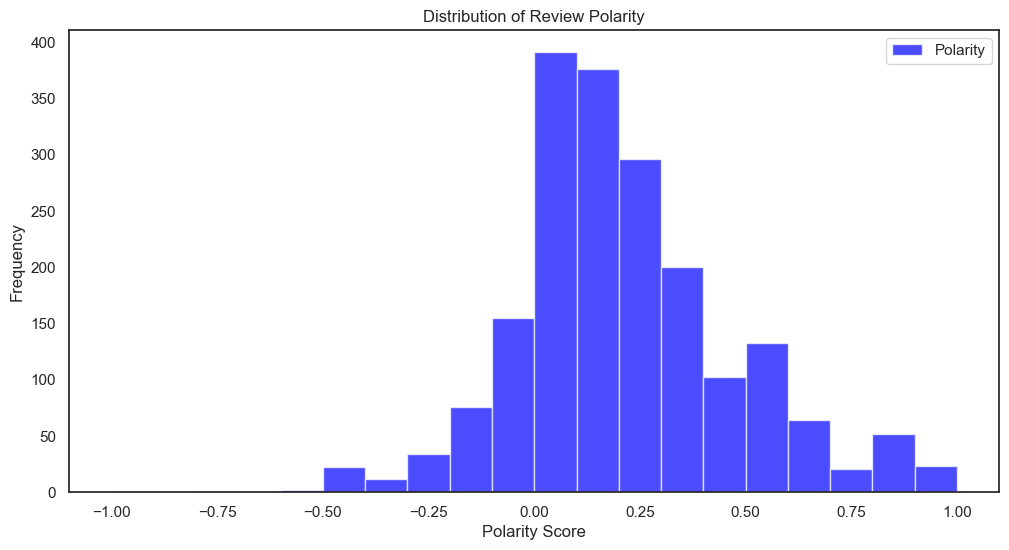

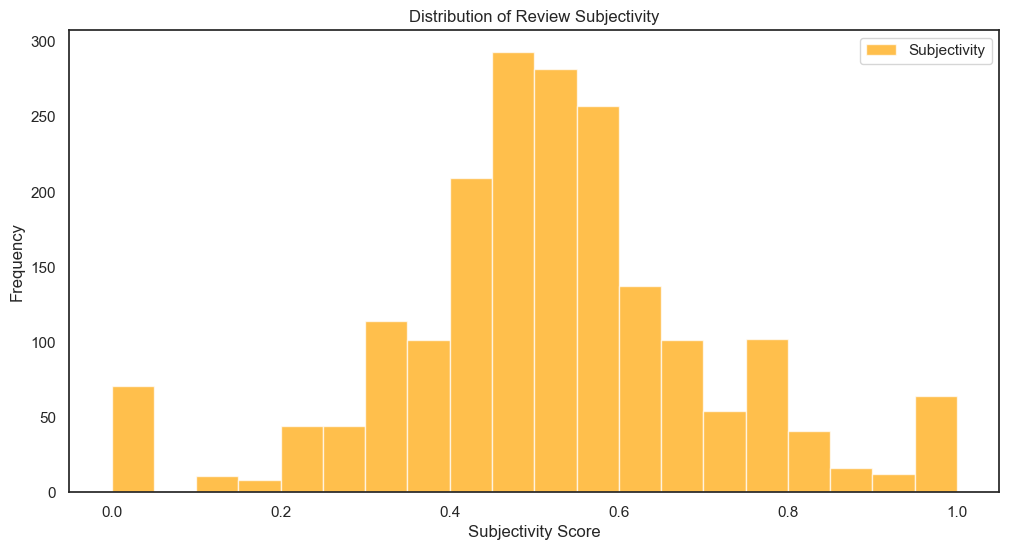

In [359]:
# Plot for Polarity
plt.figure(figsize=(12, 6))
plt.hist(df4_nodupe_copy['review_polarity'], bins=20, color='blue', alpha=0.7, label='Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Polarity')
plt.legend()
plt.savefig('Distribution of Review Polarity')

plt.show()

# Plot for Subjectivity
plt.figure(figsize=(12, 6))
plt.hist(df4_nodupe_copy['review_subjectivity'], bins=20, color='orange', alpha=0.7, label='Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Subjectivity')
plt.legend()
plt.savefig('Distribution of Review Subjectivity')

plt.show()


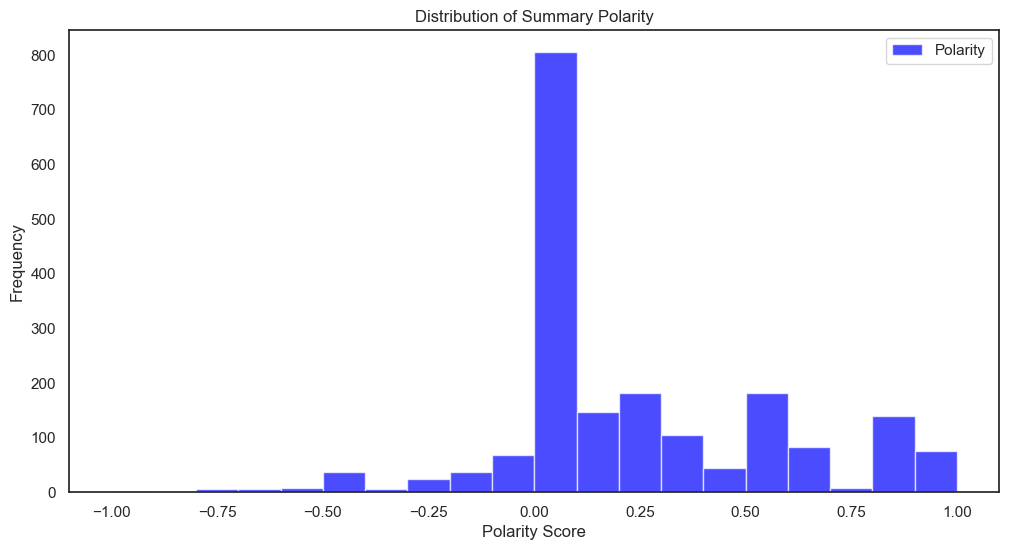

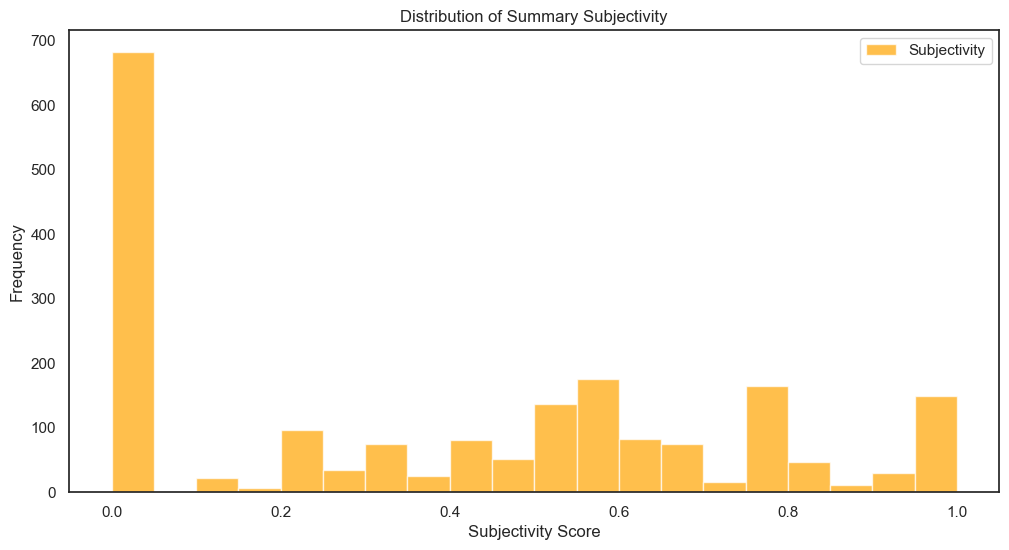

In [361]:
# Plot for Polarity
plt.figure(figsize=(12, 6))
plt.hist(df4_nodupe_copy['summary_polarity'], bins=20, color='blue', alpha=0.7, label='Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Polarity')
plt.legend()
plt.savefig('Distribution of Summary Polarity')

plt.show()

# Plot for Subjectivity
plt.figure(figsize=(12, 6))
plt.hist(df4_nodupe_copy['summary_subjectivity'], bins=20, color='orange', alpha=0.7, label='Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Subjectivity')
plt.legend()
plt.savefig('Distribution of Summary Subjectivity')

plt.show()


Observations:

- Subjectivity scores measure whether a review is more factual (0) or opinion-based (1).
- The majority of reviews hover between 0.4 and 0.6 subjectivity, implying a mix of objective and subjective content. This is typical for product reviews where people express personal opinions while also mentioning factual information

**Additional : Mean Polarity and Subjectivity Scores for Reviews and Summaries**

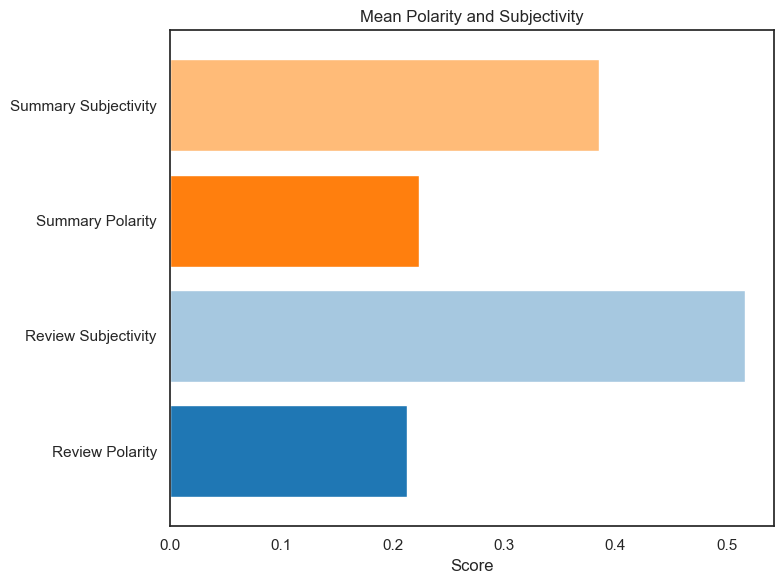

In [490]:
# Calculate the mean values
summary_stats = df4_nodupe_copy[['review_polarity', 'review_subjectivity', 'summary_polarity', 'summary_subjectivity']].mean()

# Rename the indices for better clarity
summary_stats.index = ['Review Polarity', 'Review Subjectivity', 'Summary Polarity', 'Summary Subjectivity']

# dark and light shades for reviews and summaries
colors = ['#1f77b4', '#a6c8e0',  # Dark blue, Light blue for reviews
          '#ff7f0e', '#ffbb78']  # Dark orange, Light orange for summaries

plt.figure(figsize=(8, 6))
summary_stats.plot(kind='barh', color=colors, width=0.8)  # 'barh' for horizontal bar chart
plt.title('Mean Polarity and Subjectivity')
plt.xlabel('Score')  
plt.ylabel('')  
plt.tight_layout()  

# plt.savefig('Mean Polarity and Subjectivity')

plt.show()


Observations:

- The mean subjectivity suggests that reviews are more subjective than summaries, but the distribution shows that some summaries are highly subjective while a large portion is factual (hence the spike at 0)
- The polarity for both reviews and summaries skews positive, suggesting that overall customer sentiment is favorable 

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [368]:
# Top 20 negative reviews by review_polarity.
negative_reviews = df_subjectivity_polarity.nsmallest(20, 'review_polarity')

# Keep only the relevant columns for review polarity and subjectivity.
negative_reviews = negative_reviews[['customer_review', 'review_polarity', 'review_subjectivity']]

# Adjust column width (optional, only for better viewing).
negative_reviews.style.set_properties(subset=['customer_review'], **{'width': '1200px'})

# View output.
negative_reviews


customer_review  review_polarity  \
208   booo unles you are patient know how to measure...        -1.000000   
182                   incomplete kit very disappointing        -0.780000   
1804  im sorry i just find this product to be boring...        -0.583333   
364   one of my staff will be using this game soon s...        -0.550000   
117   i bought this as a christmas gift for my grand...        -0.500000   
227   this was a gift for my daughter i found it dif...        -0.500000   
230                    i found the directions difficult        -0.500000   
290              instructions are complicated to follow        -0.500000   
301                                           difficult        -0.500000   
1524                         expensive for what you get        -0.500000   
174   i sent this product to my granddaughter the po...        -0.491667   
347   my 8 yearold granddaughter and i were very fru...        -0.446250   
538   i purchased this on the recommendation of two ...        -0.440741   
306                 very hard complicated to make these        -0.439583   
427                     kids i work with like this game        -0.400000   
437   this game although it appears to be like uno a...        -0.400000   
497   my son loves playing this game it was recommen...        -0.400000   
803                                this game is a blast        -0.400000   
806         i bought this for my son he loves this game        -0.400000   
824             was a gift for my son he loves the game        -0.400000   

      review_subjectivity  
208              1.000000  
182              0.910000  
1804             0.750000  
364              0.300000  
117              0.900000  
227              1.000000  
230              1.000000  
290              1.000000  
301              1.000000  
1524             0.700000  
174              0.433333  
347              0.533750  
538              0.485185  
306              0.852083  
427              0.400000  
437              0.400000  
497              0.400000  
803              0.400000  
806              0.400000  
824              0.400000

In [369]:
# Top 20 negative summaries by summary_polarity.
negative_summaries = df_subjectivity_polarity.nsmallest(20, 'summary_polarity')

# Keep only the relevant columns for summary polarity and subjectivity.
negative_summaries = negative_summaries[['review_summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust column width (optional, only for better viewing).
negative_summaries.style.set_properties(subset=['review_summary'], **{'width': '1200px'})

# View output.
negative_summaries


review_summary  summary_polarity  \
21                        the worst value ive ever seen         -1.000000   
208    boring unless you are a craft person which i am          -1.000000   
829                                              boring         -1.000000   
1166  before this i hated running any rpg campaign d...         -0.900000   
1     another worthless dungeon masters screen from ...         -0.800000   
144                                        disappointed         -0.750000   
631                                        disappointed         -0.750000   
793                                        disappointed         -0.750000   
1620                                       disappointed         -0.750000   
363   promotes anger instead of teaching calming met...         -0.700000   
885            too bad this is not what i was expecting         -0.700000   
890                        bad qualityall made of paper         -0.700000   
178     at age 31 i found these very difficult to make          -0.650000   
101                                    small and boring         -0.625000   
518                                          mad dragon         -0.625000   
805                                       disappointing         -0.600000   
1015                                      disappointing         -0.600000   
1115                                      disappointing         -0.600000   
1804                                      disappointing         -0.600000   
1003  then you will find this board game to be dumb ...         -0.591667   

      summary_subjectivity  
21                1.000000  
208               1.000000  
829               1.000000  
1166              0.700000  
1                 0.900000  
144               0.750000  
631               0.750000  
793               0.750000  
1620              0.750000  
363               0.200000  
885               0.666667  
890               0.666667  
178               1.000000  
101               0.700000  
518               1.000000  
805               0.700000  
1015              0.700000  
1115              0.700000  
1804              0.700000  
1003              0.633333

In [371]:
# Top 20 positive reviews by review_polarity.
positive_reviews = df_subjectivity_polarity.nlargest(20, 'review_polarity')

# Keep only the relevant columns for review polarity and subjectivity, and drop the summary-related columns.
positive_reviews = positive_reviews[['customer_review', 'review_polarity', 'review_subjectivity']]

# Adjust column width (optional, only for better viewing).
positive_reviews.style.set_properties(subset=['customer_review'], **{'width': '1200px'})

# View output.
positive_reviews


customer_review  review_polarity  \
7                             came in perfect condition              1.0   
165                                        awesome book              1.0   
194                                        awesome gift              1.0   
496   excellent activity for teaching selfmanagement...              1.0   
524                         perfect just what i ordered              1.0   
591                                   wonderful product              1.0   
609                                  delightful product              1.0   
621   wonderful for my grandson to learn the resurre...              1.0   
790                                             perfect              1.0   
933                                             awesome              1.0   
1135                                        awesome set              1.0   
1168               best set buy 2 if you have the means              1.0   
1177               awesome addition to my rpg gm system              1.0   
1301                                        its awesome              1.0   
1401  one of the best board games i played in along ...              1.0   
1550  my daughter loves her stickers awesome seller ...              1.0   
1609  this was perfect to go with the 7 bean bags  i...              1.0   
1715                                        awesome toy              1.0   
1720  it is the best thing to play with and also min...              1.0   
1726                  excellent toy to simulate thought              1.0   

      review_subjectivity  
7                     1.0  
165                   1.0  
194                   1.0  
496                   1.0  
524                   1.0  
591                   1.0  
609                   1.0  
621                   1.0  
790                   1.0  
933                   1.0  
1135                  1.0  
1168                  0.3  
1177                  1.0  
1301                  1.0  
1401                  0.3  
1550                  1.0  
1609                  1.0  
1715                  1.0  
1720                  0.3  
1726                  1.0

In [372]:
# Top 20 positive summaries by summary_polarity.
positive_summaries = df_subjectivity_polarity.nlargest(20, 'summary_polarity')

# Keep only the relevant columns for summary polarity and subjectivity, and drop the review-related columns.
positive_summaries = positive_summaries[['review_summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust column width (optional, only for better viewing).
positive_summaries.style.set_properties(subset=['review_summary'], **{'width': '1200px'})

# View output.
positive_summaries

review_summary  summary_polarity  \
6                                  best gm screen ever               1.0   
28                                   wonderful designs               1.0   
32                                             perfect               1.0   
80   theyre the perfect size to keep in the car or ...               1.0   
134                            perfect for preschooler               1.0   
140             awesome sticker activity for the price               1.0   
161                                       awesome book               1.0   
163                    he was very happy with his gift               1.0   
187                                            awesome               1.0   
210           awesome and welldesigned for 9 year olds               1.0   
418                                            perfect               1.0   
475                                          excellent               1.0   
543                                          excellent               1.0   
548                             excellent therapy tool               1.0   
580  the pigeon is the perfect addition to a school...               1.0   
599                          best easter teaching tool               1.0   
647                                          wonderful               1.0   
651              all f the mudpuppy toys are wonderful               1.0   
657                                     awesome puzzle               1.0   
662                               not the best quality               1.0   

     summary_subjectivity  
6                     0.3  
28                    1.0  
32                    1.0  
80                    1.0  
134                   1.0  
140                   1.0  
161                   1.0  
163                   1.0  
187                   1.0  
210                   1.0  
418                   1.0  
475                   1.0  
543                   1.0  
548                   1.0  
580                   1.0  
599                   0.3  
647                   1.0  
651                   1.0  
657                   1.0  
662                   0.3

**Additional**

Note: For deeper analysis and to gather more actionable insights, I decided to focus only on 'customer review' coulmn .

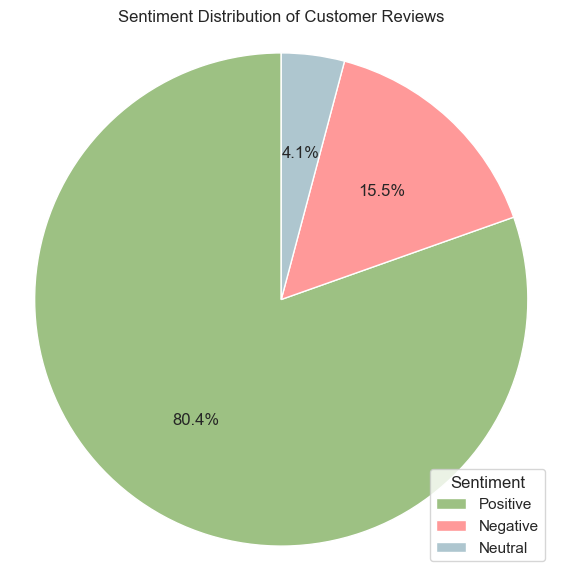

In [441]:
# Classify reviews as Positive, Negative, or Neutral based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification to the 'review_polarity' column
df4_nodupe_copy['sentiment'] = df4_nodupe_copy['review_polarity'].apply(classify_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df4_nodupe_copy['sentiment'].value_counts()

# Plot the sentiment distribution in a pie chart with custom colors
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, autopct='%1.1f%%', startangle=90, 
        colors=['#9dc183', '#ff9999', '#aec6cf'])  

# Add a legend instead of labels
plt.legend(labels=sentiment_counts.index, loc="lower right", title="Sentiment")

# Set equal aspect ratio to ensure the pie is drawn as a circle
plt.axis('equal')
plt.title('Sentiment Distribution of Customer Reviews')

# plt.savefig("Sentiment Distribution of Customer Reviews")

# Show the pie chart
plt.show()

Observations:
- Approximately 80% of the reviews are positive, while around 15% are negative and 4% are neutral. This pie chart clearly highlights the overwhelming positive sentiment in the dataset .

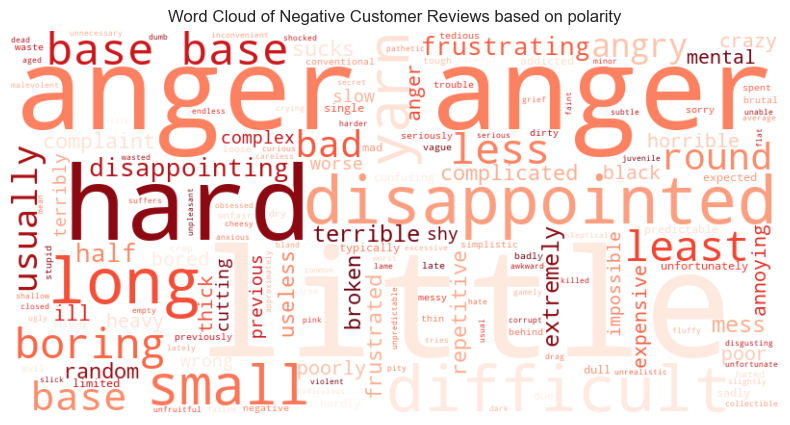

In [445]:
# Remove the word 'game', 'Game', and other neutral/positive terms before generating the word cloud
def remove_neutral_positive_words(text):
    # List of words to specifically filter out
    words_to_exclude = ['game', 'Game']
    
    words = text.split()
    # Filter words based on polarity and exclude specific words
    filtered_words = [word for word in words if TextBlob(word).sentiment.polarity < 0 and word not in words_to_exclude]
    
    return ' '.join(filtered_words)

# Apply the function to the negative reviews text
negative_reviews['filtered_review'] = negative_reviews['customer_review'].apply(remove_neutral_positive_words)

# Concatenate all filtered negative review text into a single string
negative_reviews_text_filtered = ' '.join(negative_reviews['filtered_review'])

# Create a Word Cloud from the filtered negative reviews text 
negative_wordcloud_filtered = WordCloud(width=800, 
                                        height=400, 
                                        background_color='white', 
                                        colormap='Reds').generate(negative_reviews_text_filtered)

# Plot the word cloud for negative reviews (without neutral/positive words)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Customer Reviews based on polarity')

# plt.savefig('Word Cloud of Negative Customer Reviews based on polarity')

plt.show()


Observatiosn:
- Negative words like "anger," "hard," and "disappointed" are prominent, indicating the key frustrations and issues customers have faced with the products. This can help the company focus on these areas to improve customer satisfaction 

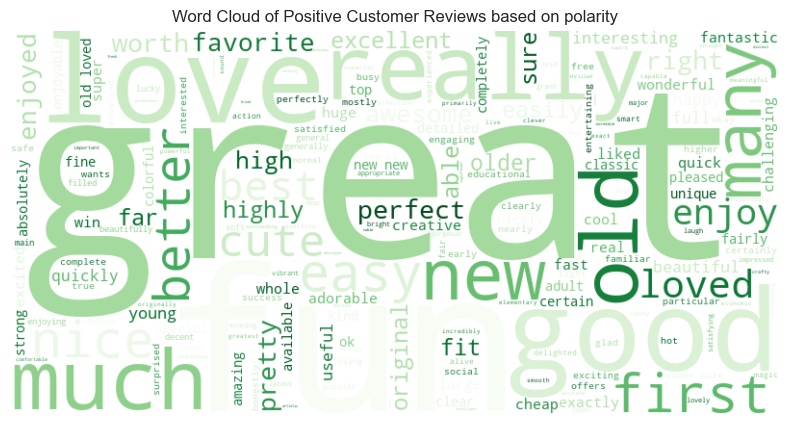

In [447]:
# Remove the word 'game', 'Game', and other neutral/negative terms before generating the word cloud for positive reviews
def remove_neutral_negative_words(text):
    words_to_exclude = ['game', 'Game']
    words = text.split()
    # Filter words based on polarity and exclude specific words
    filtered_words = [word for word in words if TextBlob(word).sentiment.polarity > 0 and word not in words_to_exclude]
    return ' '.join(filtered_words)

# Apply the function to the positive reviews text
positive_reviews['filtered_review'] = positive_reviews['customer_review'].apply(remove_neutral_negative_words)

# Concatenate all filtered positive review text into a single string
positive_reviews_text_filtered = ' '.join(positive_reviews['filtered_review'])

# Create a Word Cloud from the filtered positive reviews text
positive_wordcloud_filtered = WordCloud(width=800, 
                                        height=400, 
                                        background_color='white', 
                                        colormap='Greens').generate(positive_reviews_text_filtered)

# Plot the word cloud for positive reviews (without 'game' or neutral/negative words)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Customer Reviews based on polarity')

# plt.savefig('Word Cloud of Positive Customer Reviews based on polarity')

plt.show()


Observations:
- Words like "great," "love," and "perfect" stand out, reflecting the most common positive sentiments expressed by customers. The frequent appearance of these words suggests a high level of customer satisfaction

## Final Insights and observations

- Over 80% of reviews are positive, highlighting customer satisfaction with Turtle Games' products and services
- Negative feedback focuses on possibel product complexity, with issues related to difficult instructions and usability.
- Polarity measures sentiment (positive, negative, or neutral), but subjectivity captures the emotional tone or personal bias in reviews. Combining polarity and subjectivity allows the company to differentiate between factual product issues and emotionally-driven responses.
- Simplify products, improve instructions, and offer tutorials can be used to address common customer concerns.
- Leveraging positive feedback in marketing campaigns can emphasise fun, enjoyment, and product value in porducts and services.

# 